# Project 5: Application - Twitter data

## Questionn 1:
Report the following statistics for each hashtag, i.e. each file

Have a look at the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import json

files = ["ECE219_tweet_data/tweets_#gohawks.txt",
         "ECE219_tweet_data/tweets_#gopatriots.txt",
         "ECE219_tweet_data/tweets_#nfl.txt",
         "ECE219_tweet_data/tweets_#patriots.txt",
         "ECE219_tweet_data/tweets_#sb49.txt",
         "ECE219_tweet_data/tweets_#superbowl.txt"]

with open(files[0], 'r') as file:
    first_line = file.readline()
    json_obj = json.loads(first_line)
    for key in json_obj:
        print(key)
    print('-' * 40)
    for key in json_obj:
        print(key + ':')
        print(json_obj[key])
        print('-' * 40)

firstpost_date
title
url
tweet
author
original_author
citation_date
metrics
highlight
type
citation_url
----------------------------------------
firstpost_date:
1419804875
----------------------------------------
title:
I &lt;3 our defense! #GoHawks http://t.co/U1pcXpEsR8
----------------------------------------
url:
http://twitter.com/Mich_Fit/status/549327579782840320
----------------------------------------
tweet:
{'contributors': None, 'truncated': False, 'text': 'I &lt;3 our defense! #GoHawks http://t.co/U1pcXpEsR8', 'in_reply_to_status_id': None, 'id': 549327579782840320, 'favorite_count': 1, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'retweeted': False, 'coordinates': None, 'entities': {'symbols': [], 'media': [{'expanded_url': 'http://twitter.com/Mich_Fit/status/549327579782840320/photo/1', 'sizes': {'large': {'h': 511, 'resize': 'fit', 'w': 511}, 'small': {'h': 340, 'resize': 'fit', 'w': 340}, 'medium': {'h': 511, 'resize': 'fit', 'w': 511}

In [3]:
max_times = {"ECE219_tweet_data/tweets_#gohawks.txt": 0,
             "ECE219_tweet_data/tweets_#gopatriots.txt": 0,
             "ECE219_tweet_data/tweets_#nfl.txt": 0,
             "ECE219_tweet_data/tweets_#patriots.txt": 0,
             "ECE219_tweet_data/tweets_#sb49.txt": 0,
             "ECE219_tweet_data/tweets_#superbowl.txt": 0}

min_times = {"ECE219_tweet_data/tweets_#gohawks.txt": 0,
             "ECE219_tweet_data/tweets_#gopatriots.txt": 0,
             "ECE219_tweet_data/tweets_#nfl.txt": 0,
             "ECE219_tweet_data/tweets_#patriots.txt": 0,
             "ECE219_tweet_data/tweets_#sb49.txt": 0,
             "ECE219_tweet_data/tweets_#superbowl.txt": 0}

In [4]:
# helper funtion to report statistics for one file
# at the same time get max and min times for each file

def report_statistics(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = 2000000000
        total_followers = 0
        total_retweets = 0
        for line in lines:
            json_obj = json.loads(line)
            if(json_obj['citation_date'] > max_time):
                max_time = json_obj['citation_date']
            if(json_obj['citation_date'] < min_time):
                min_time = json_obj['citation_date']
                
            total_followers = total_followers + json_obj['author']['followers']
            
            total_retweets = total_retweets + json_obj['metrics']['citations']['total']
                
        avg_tweets_per_hour = len(lines) / (max_time - min_time) * 60 * 60
        avg_followers_per_tweet = total_followers / len(lines)
        avg_retweets_per_tweet = total_retweets / len(lines)
        
        max_times[filename] = max_time
        min_times[filename] = min_time
        
    print('-' * 40)
    print(filename)
    print("Average number of tweets per hour:")
    print(avg_tweets_per_hour)
    
    print("Average number of followers per tweet:")
    print(avg_followers_per_tweet)
    
    print("Average number of retweets per tweet:")
    print(avg_retweets_per_tweet)

- Average number of tweets per hour
- Average number of followers of users posting the tweets per tweet
- Average number of retweets per tweet

In [5]:
for file in files:
    report_statistics(file)

----------------------------------------
ECE219_tweet_data/tweets_#gohawks.txt
Average number of tweets per hour:
292.48785062173687
Average number of followers per tweet:
2217.9237355281984
Average number of retweets per tweet:
2.0132093991319877
----------------------------------------
ECE219_tweet_data/tweets_#gopatriots.txt
Average number of tweets per hour:
40.954698006061946
Average number of followers per tweet:
1427.2526051635405
Average number of retweets per tweet:
1.4081919101697078
----------------------------------------
ECE219_tweet_data/tweets_#nfl.txt
Average number of tweets per hour:
397.0213901819841
Average number of followers per tweet:
4662.37544523693
Average number of retweets per tweet:
1.5344602655543254
----------------------------------------
ECE219_tweet_data/tweets_#patriots.txt
Average number of tweets per hour:
750.89426460689
Average number of followers per tweet:
3280.4635616550277
Average number of retweets per tweet:
1.7852871288476946
--------------

## Question 2:
Plot "number of tweets in hour" over time for #SuperBowl and #NFL (a histogram with 1-hour bins)

In [6]:
import math as mt

def get_num_in_hour(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        
        max_time = max_times[filename]
        min_time = min_times[filename]

        total_hours = mt.floor((max_time - min_time) / (60 * 60)) + 1
        X = range(total_hours)
        Y = [0] * total_hours

        for line in lines:
            json_obj = json.loads(line)
            index = mt.floor((json_obj['citation_date'] - min_time) / (60 * 60))
            Y[index] = Y[index] + 1
            
        return X, Y

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_num_in_hour(X, Y, name):
    plt.figure(figsize=(10,6))
    plt.bar(X, Y, width=X[1]-X[0])
    plt.xlabel('Hours over time')
    plt.ylabel('Number of tweets')
    plt.title('number of tweets in hours for ' + name)

### SuperBowl

In [8]:
SuperBowl_X, SuperBowl_Y = get_num_in_hour(files[5])

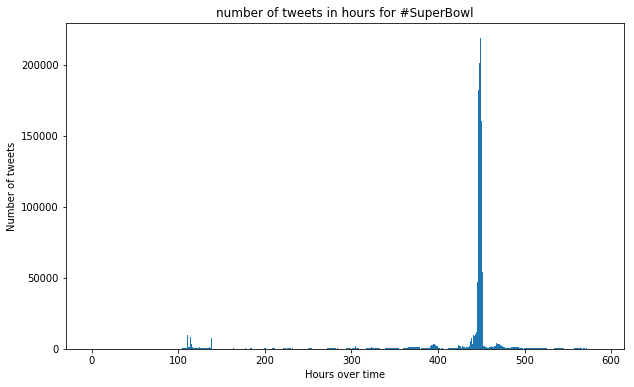

In [9]:
plot_num_in_hour(SuperBowl_X, SuperBowl_Y, "#SuperBowl")

### NFL

In [10]:
NFL_X, NFL_Y = get_num_in_hour(files[2])

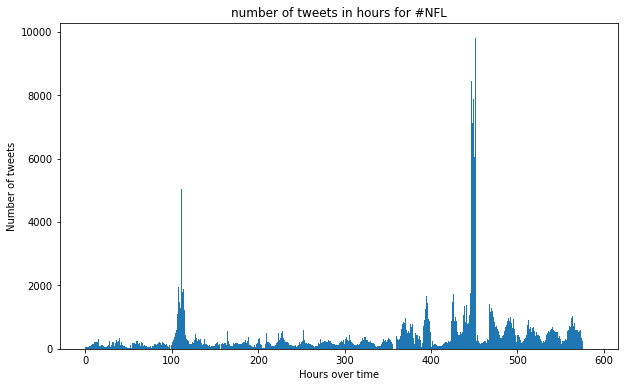

In [11]:
plot_num_in_hour(NFL_X, NFL_Y, "#NFL")

## Question 3:
For each hashtag, train a linear regression model. For each model, report the model's Mean Squared Error (MSE) and R-squared mesure. Also, analyze the significance of each feature using t-test and p-value.

In [12]:
import datetime
import pytz
import numpy as np

pst_tz = pytz.timezone('America/Los_Angeles')

def extract_feature(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = max_times[filename]
        min_time = min_times[filename]
        
        total_hours = mt.floor((max_time - min_time) / (60 * 60)) + 1
        
        num_tweets = 0
        num_retweets = 0
        num_followers = 0
        max_num_followers = 0
        time_windows = []
        
        for hour in range(total_hours):
            datetime_object_in_pst_timezone = datetime.datetime.fromtimestamp(min_time + hour * 60 * 60, pst_tz)
            time_of_day = datetime_object_in_pst_timezone.hour
            time_windows.append([num_tweets, num_retweets, num_followers, max_num_followers, time_of_day])
            
        for line in lines:
            json_obj = json.loads(line)
            index = mt.floor((json_obj['citation_date'] - min_time) / (60 * 60))
            time_windows[index][0] = time_windows[index][0] + 1 # update num_tweets
            time_windows[index][1] = time_windows[index][1] + json_obj['metrics']['citations']['total'] # update num_retweets  
            time_windows[index][2] = time_windows[index][2] + json_obj['author']['followers'] # update num_followers
            time_windows[index][3] = max(time_windows[index][3], json_obj['author']['followers']) # update max_num_followers
            
        return np.array(time_windows)

### Gohawks

In [13]:
time_windows_gohawks = extract_feature(files[0])

gohawks_X = time_windows_gohawks[0:-1,:]
gohawks_Y = time_windows_gohawks[1:,0]

In [14]:
from statsmodels.api import OLS

lr_gohawks = OLS(gohawks_Y, gohawks_X).fit()

print(lr_gohawks.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           5.72e-91
Time:                        13:09:27   Log-Likelihood:                -4716.9
No. Observations:                 578   AIC:                             9444.
Df Residuals:                     573   BIC:                             9466.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5364      0.161      9.566      0.0

In [15]:
from statsmodels.api import tools
gohawks_predict = lr_gohawks.predict(gohawks_X)
gohawks_mse = tools.eval_measures.mse(gohawks_Y, gohawks_predict)

print("MSE for #gohawks:", gohawks_mse)

MSE for #gohawks: 717636.4421300612


### Gopatriots

In [16]:
time_windows_gopatriots = extract_feature(files[1])

gopatriots_X = time_windows_gopatriots[0:-1,:]
gopatriots_Y = time_windows_gopatriots[1:,0]

In [17]:
lr_gopatriots = OLS(gopatriots_Y, gopatriots_X).fit()

print(lr_gopatriots.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     174.7
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          1.90e-112
Time:                        13:09:31   Log-Likelihood:                -3778.9
No. Observations:                 574   AIC:                             7568.
Df Residuals:                     569   BIC:                             7590.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1425      0.288     -0.495      0.6

In [18]:
gopatriots_predict = lr_gopatriots.predict(gopatriots_X)
gopatriots_mse = tools.eval_measures.mse(gopatriots_Y, gopatriots_predict)

print("MSE for #gopatriots:", gopatriots_mse)

MSE for #gopatriots: 30607.578574064664


### NFL

In [19]:
time_windows_nfl = extract_feature(files[2])

nfl_X = time_windows_nfl[0:-1,:]
nfl_Y = time_windows_nfl[1:,0]

In [20]:
lr_nfl = OLS(nfl_Y, nfl_X).fit()

print(lr_nfl.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     216.7
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          3.16e-130
Time:                        13:10:12   Log-Likelihood:                -4500.8
No. Observations:                 586   AIC:                             9012.
Df Residuals:                     581   BIC:                             9034.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6449      0.136      4.736      0.0

In [21]:
nfl_predict = lr_nfl.predict(nfl_X)
nfl_mse = tools.eval_measures.mse(nfl_Y, nfl_predict)

print("MSE for #nfl:", nfl_mse)

MSE for #nfl: 274661.967732064


### Patriots

In [22]:
time_windows_patriots = extract_feature(files[3])

patriots_X = time_windows_patriots[0:-1,:]
patriots_Y = time_windows_patriots[1:,0]

In [23]:
lr_patriots = OLS(patriots_Y, patriots_X).fit()

print(lr_patriots.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     290.9
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          1.55e-155
Time:                        13:11:22   Log-Likelihood:                -5325.4
No. Observations:                 586   AIC:                         1.066e+04
Df Residuals:                     581   BIC:                         1.068e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2195      0.079     15.391      0.0

In [24]:
patriots_predict = lr_patriots.predict(patriots_X)
patriots_mse = tools.eval_measures.mse(patriots_Y, patriots_predict)

print("MSE for #patriots:", patriots_mse)

MSE for #patriots: 4581686.32283954


### sb49

In [25]:
time_windows_sb49 = extract_feature(files[4])

sb49_X = time_windows_sb49[0:-1,:]
sb49_Y = time_windows_sb49[1:,0]

In [26]:
lr_sb49 = OLS(sb49_Y, sb49_X).fit()

print(lr_sb49.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     613.3
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          3.58e-228
Time:                        13:13:19   Log-Likelihood:                -5596.3
No. Observations:                 582   AIC:                         1.120e+04
Df Residuals:                     577   BIC:                         1.122e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1630      0.089     13.020      0.0

In [27]:
sb49_predict = lr_sb49.predict(sb49_X)
sb49_mse = tools.eval_measures.mse(sb49_Y, sb49_predict)

print("MSE for #sb49:", sb49_mse)

MSE for #sb49: 13170997.953818947


### Superbowl

In [28]:
time_windows_superbowl = extract_feature(files[5])

superbowl_X = time_windows_superbowl[0:-1,:]
superbowl_Y = time_windows_superbowl[1:,0]

In [29]:
lr_superbowl = OLS(superbowl_Y, superbowl_X).fit()

print(lr_superbowl.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     777.5
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          2.25e-254
Time:                        13:16:25   Log-Likelihood:                -5903.8
No. Observations:                 585   AIC:                         1.182e+04
Df Residuals:                     580   BIC:                         1.184e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.6639      0.111     24.048      0.0

In [30]:
superbowl_predict = lr_superbowl.predict(superbowl_X)
superbowl_mse = tools.eval_measures.mse(superbowl_Y, superbowl_predict)

print("MSE for #superbowl:", superbowl_mse)

MSE for #superbowl: 34137549.2586825


## Question 4:
Design a regression model using any features from the paper you find or other new features you may find useful for this problem. Fit your model on the data of each hashtag and report fitting MSE and significance of features.

New Features (with reference to paper)
- Author Count
- Mentions Count
- Passivity
- Friends Count
- Ranking Score

In [31]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
          'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

def get_account_days(tweet):
    account_create_date = tweet['tweet']['user']['created_at'].split(' ')
    post_date = tweet['tweet']['created_at'].split(' ')
    datetime_account = datetime.datetime(int(account_create_date[5]),
                                         months[account_create_date[1]],
                                         int(account_create_date[2]))
    datetime_post = datetime.datetime(int(post_date[5]),
                                      months[post_date[1]],
                                      int(post_date[2]))
    return (datetime_post - datetime_account).days

In [32]:
def extract_feature_v2(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = max_times[filename]
        min_time = min_times[filename]
        
        total_hours = mt.floor((max_time - min_time) / (60 * 60)) + 1
        
        authors = []
        unique_authors = 0
        mentions = 0
        passivity = 0.0
        num_friends = 0
        ranking_score = 0.0
        time_windows = []
        
        for hour in range(total_hours):
            authors.append(set())
            time_windows.append([unique_authors, mentions, passivity, num_friends, ranking_score])
            
        for line in lines:
            json_obj = json.loads(line)
            index = mt.floor((json_obj['citation_date'] - min_time) / (60 * 60))
            authors[index].add(json_obj['author']['name'])
            time_windows[index][1] = time_windows[index][1] + len(json_obj['tweet']['entities']['user_mentions'])
            
            account_days = get_account_days(json_obj)
            num_tweets = json_obj['tweet']['user']['followers_count']
            time_windows[index][2] = time_windows[index][2] + (account_days / (1.0 + num_tweets))
            
            time_windows[index][3] = time_windows[index][3] + json_obj['tweet']['user']['friends_count']
            time_windows[index][4] = time_windows[index][4] + json_obj['metrics']['ranking_score'] 
            
        for i in range(total_hours):
            time_windows[i][0] = len(authors[i])
            
        return np.array(time_windows)

### Gohawks

In [33]:
time_windows_gohawks_v2 = extract_feature_v2(files[0])

gohawks_X_v2 = time_windows_gohawks_v2[0:-1,:]
gohawks_Y_v2 = time_windows_gohawks_v2[1:,0]

In [34]:
lr_gohawks_v2 = OLS(gohawks_Y_v2, gohawks_X_v2).fit()

print(lr_gohawks_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     204.5
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          7.15e-125
Time:                        13:16:50   Log-Likelihood:                -4487.0
No. Observations:                 578   AIC:                             8984.
Df Residuals:                     573   BIC:                             9006.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5507      0.442      3.507      0.0

In [35]:
gohawks_predict_v2 = lr_gohawks_v2.predict(gohawks_X_v2)
gohawks_mse_v2 = tools.eval_measures.mse(gohawks_Y_v2, gohawks_predict_v2)

print("MSE for #gohawks:", gohawks_mse_v2)

MSE for #gohawks: 323897.54687539785


### Gopatriots

In [36]:
time_windows_gopatriots_v2 = extract_feature_v2(files[1])

gopatriots_X_v2 = time_windows_gopatriots_v2[0:-1,:]
gopatriots_Y_v2 = time_windows_gopatriots_v2[1:,0]

In [37]:
lr_gopatriots_v2 = OLS(gopatriots_Y_v2, gopatriots_X_v2).fit()

print(lr_gopatriots_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     547.3
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          1.12e-214
Time:                        13:16:53   Log-Likelihood:                -3459.2
No. Observations:                 574   AIC:                             6928.
Df Residuals:                     569   BIC:                             6950.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -3.5377      0.305    -11.590      0.0

In [38]:
gopatriots_predict_v2 = lr_gopatriots_v2.predict(gopatriots_X_v2)
gopatriots_mse_v2 = tools.eval_measures.mse(gopatriots_Y_v2, gopatriots_predict_v2)

print("MSE for #gopatriots:", gopatriots_mse_v2)

MSE for #gopatriots: 10048.18495094565


### nfl

In [39]:
time_windows_nfl_v2 = extract_feature_v2(files[2])

nfl_X_v2 = time_windows_nfl_v2[0:-1,:]
nfl_Y_v2 = time_windows_nfl_v2[1:,0]

In [40]:
lr_nfl_v2 = OLS(nfl_Y_v2, nfl_X_v2).fit()

print(lr_nfl_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     206.3
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          3.06e-126
Time:                        13:17:27   Log-Likelihood:                -4329.3
No. Observations:                 586   AIC:                             8669.
Df Residuals:                     581   BIC:                             8690.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.0295      0.245     -8.273      0.0

In [41]:
nfl_predict_v2 = lr_nfl_v2.predict(nfl_X_v2)
nfl_mse_v2 = tools.eval_measures.mse(nfl_Y_v2, nfl_predict_v2)

print("MSE for #nfl:", nfl_mse_v2)

MSE for #nfl: 152929.93865975138


### Patriots

In [42]:
time_windows_patriots_v2 = extract_feature_v2(files[3])

patriots_X_v2 = time_windows_patriots_v2[0:-1,:]
patriots_Y_v2 = time_windows_patriots_v2[1:,0]

In [43]:
lr_patriots_v2 = OLS(patriots_Y_v2, patriots_X_v2).fit()

print(lr_patriots_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     329.4
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          6.47e-167
Time:                        13:18:22   Log-Likelihood:                -5214.4
No. Observations:                 586   AIC:                         1.044e+04
Df Residuals:                     581   BIC:                         1.046e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.8095      0.739      3.800      0.0

In [44]:
patriots_predict_v2 = lr_patriots_v2.predict(patriots_X_v2)
patriots_mse_v2 = tools.eval_measures.mse(patriots_Y_v2, patriots_predict_v2)

print("MSE for #patriots:", patriots_mse_v2)

MSE for #patriots: 3137239.2363916375


### sb49

In [45]:
time_windows_sb49_v2 = extract_feature_v2(files[4])

sb49_X_v2 = time_windows_sb49_v2[0:-1,:]
sb49_Y_v2 = time_windows_sb49_v2[1:,0]

In [46]:
lr_sb49_v2 = OLS(sb49_Y_v2, sb49_X_v2).fit()

print(lr_sb49_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1033.
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          4.02e-285
Time:                        13:19:54   Log-Likelihood:                -5322.3
No. Observations:                 582   AIC:                         1.065e+04
Df Residuals:                     577   BIC:                         1.068e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2517      0.353      3.548      0.0

In [47]:
sb49_predict_v2 = lr_sb49_v2.predict(sb49_X_v2)
sb49_mse_v2 = tools.eval_measures.mse(sb49_Y_v2, sb49_predict_v2)

print("MSE for #sb49:", sb49_mse_v2)

MSE for #sb49: 5136384.8748582555


### Superbowl

In [48]:
time_windows_superbowl_v2 = extract_feature_v2(files[5])

superbowl_X_v2 = time_windows_superbowl_v2[0:-1,:]
superbowl_Y_v2 = time_windows_superbowl_v2[1:,0]

In [49]:
lr_superbowl_v2 = OLS(superbowl_Y_v2, superbowl_X_v2).fit()

print(lr_superbowl_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     749.3
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          2.48e-250
Time:                        13:22:23   Log-Likelihood:                -5673.9
No. Observations:                 585   AIC:                         1.136e+04
Df Residuals:                     580   BIC:                         1.138e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.6603      0.262     10.158      0.0

In [50]:
superbowl_predict_v2 = lr_superbowl_v2.predict(superbowl_X_v2)
superbowl_mse_v2 = tools.eval_measures.mse(superbowl_Y_v2, superbowl_predict_v2)

print("MSE for #superbowl:", superbowl_mse_v2)

MSE for #superbowl: 15556798.96047944


## Question 5:
For each of the top 3 features (i.e. with the smallest p-values) in your measurements, draw a scatter plot of predictant (number of tweets for next hour) versus value of that feature, using all the samples you have extracted, and analyze it.

Do the regression coefficients agree with the trends in the plots? If not, why?

#### For each hashtag, the top 3 features are calculated respectively.

In [51]:
def scatter_plot(feature_values, predictant, hashtag, features):
    print('-' * 20, hashtag, '-' * 20)
    for i in range(3):
        plt.figure(figsize = (8,5))
        plt.scatter(feature_values[:,i], predictant, alpha=0.5)
        plt.title("Tweets next hour - " + features[i])
        plt.xlabel(features[i])
        plt.ylabel("Tweets next hour")
        plt.grid(True)

In [52]:
def top_features(p_values):
    idx = np.argsort(p_values)
    return idx[:4]

In [53]:
# Get each p-values for different hashtags
p_gohawks_v2 = lr_gohawks_v2.pvalues
p_gopatriots_v2 = lr_gopatriots_v2.pvalues
p_nfl_v2 = lr_nfl_v2.pvalues
p_patriots_v2 = lr_patriots_v2.pvalues
p_sb49_v2 = lr_sb49_v2.pvalues
p_superbowl_v2 = lr_superbowl_v2.pvalues

feature_names = {0:'Author Count', 1:'Mentions Count', 2:'Passivity', 3:'Friends Count', 4:'Ranking Score'}

### Gohawks

-------------------- #gohawks --------------------


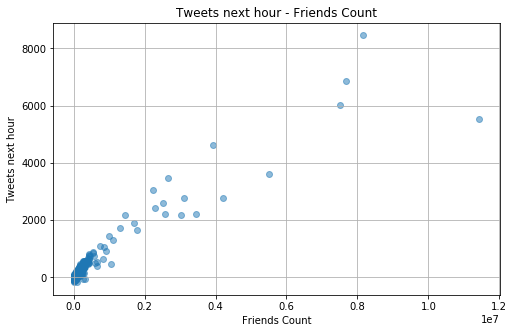

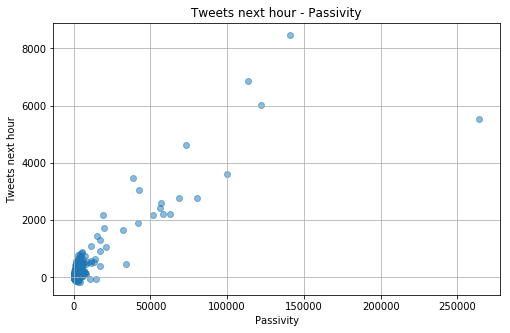

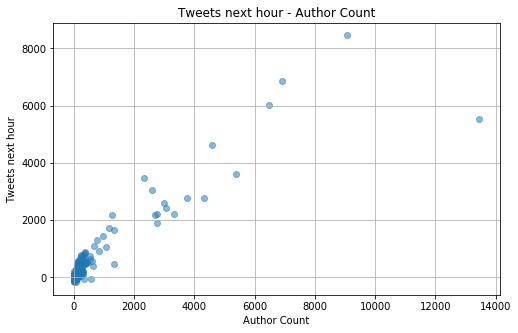

In [54]:
gohawks_top = top_features(p_gohawks_v2)

scatter_plot(time_windows_gohawks_v2[0:-1,gohawks_top],
             gohawks_predict_v2,
             "#gohawks",
             [feature_names[i] for i in gohawks_top])

### Gopatriots

-------------------- #gopatriots --------------------


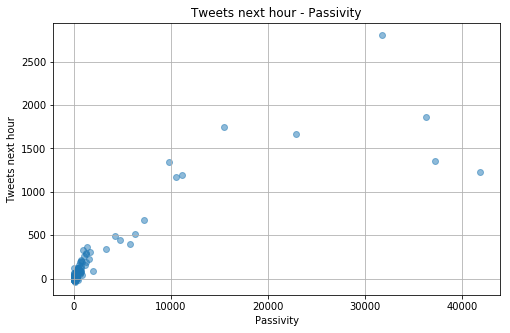

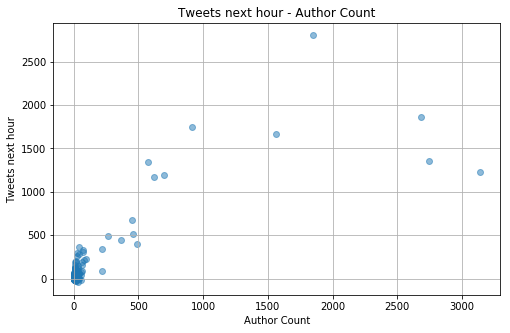

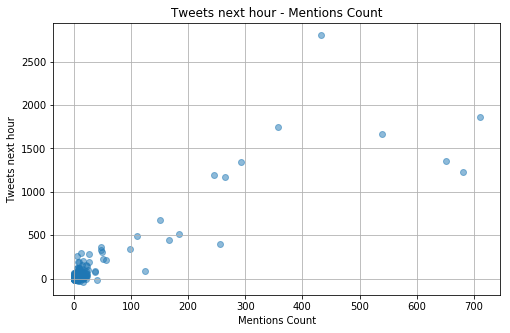

In [55]:
gopatriots_top = top_features(p_gopatriots_v2)

scatter_plot(time_windows_gopatriots_v2[0:-1,gopatriots_top],
             gopatriots_predict_v2,
             "#gopatriots",
             [feature_names[i] for i in gopatriots_top])

### nfl

-------------------- #nfl --------------------


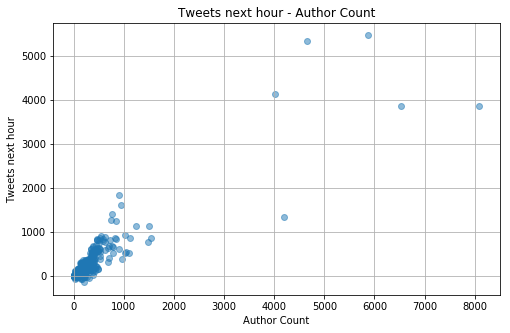

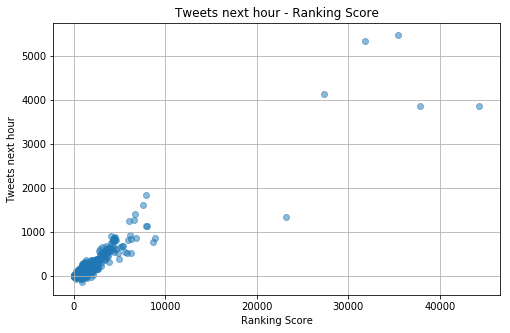

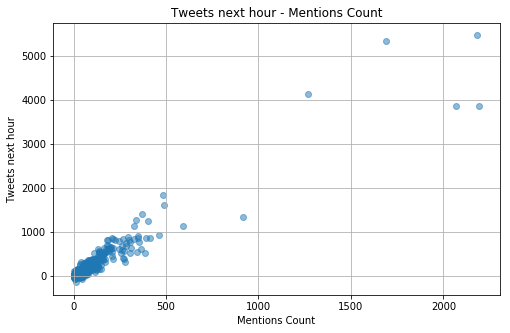

In [56]:
nfl_top = top_features(p_nfl_v2)

scatter_plot(time_windows_nfl_v2[0:-1,nfl_top],
             nfl_predict_v2,
             "#nfl",
             [feature_names[i] for i in nfl_top])

### Patriots

-------------------- #patriots --------------------


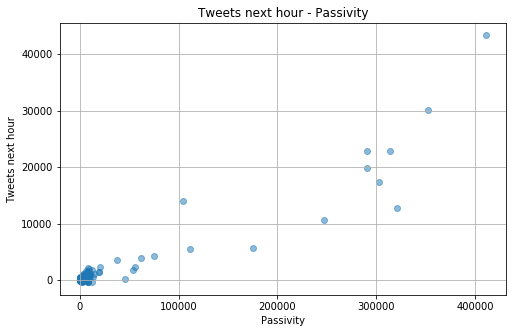

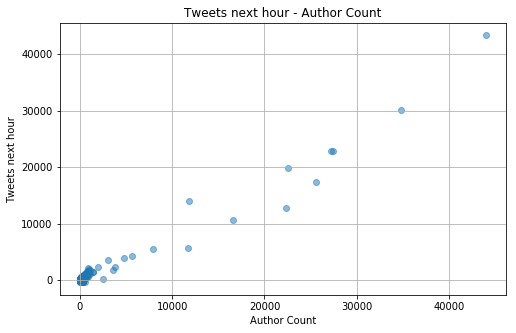

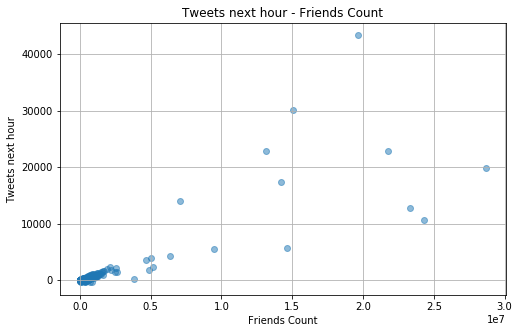

In [57]:
patriots_top = top_features(p_patriots_v2)

scatter_plot(time_windows_patriots_v2[0:-1,patriots_top],
             patriots_predict_v2,
             "#patriots",
             [feature_names[i] for i in patriots_top])

### sb49

-------------------- #sb49 --------------------


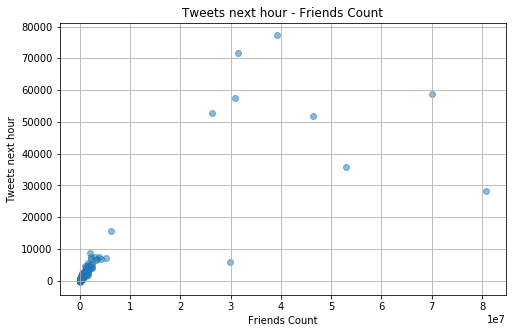

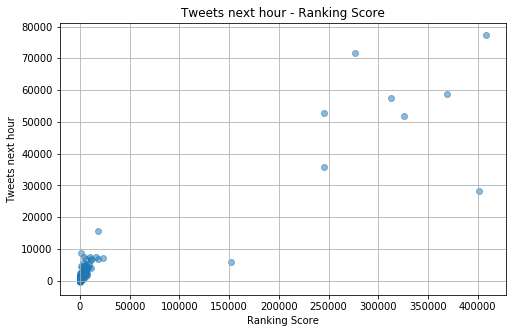

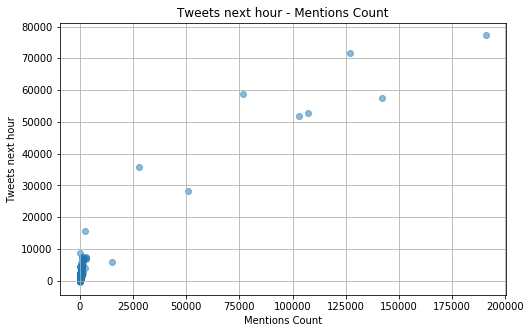

In [58]:
sb49_top = top_features(p_sb49_v2)

scatter_plot(time_windows_sb49_v2[0:-1,sb49_top],
             sb49_predict_v2,
             "#sb49",
             [feature_names[i] for i in sb49_top])

### Superbowl

-------------------- #superbowl --------------------


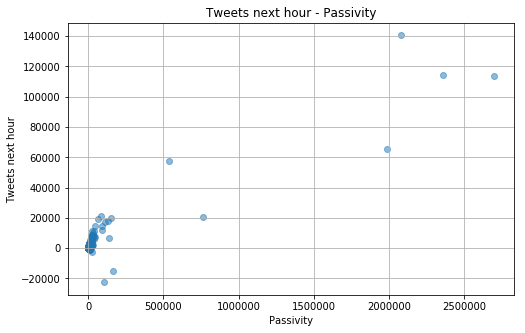

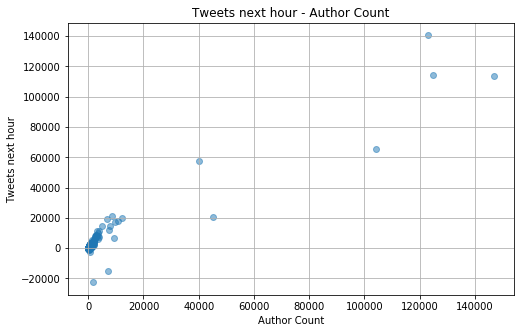

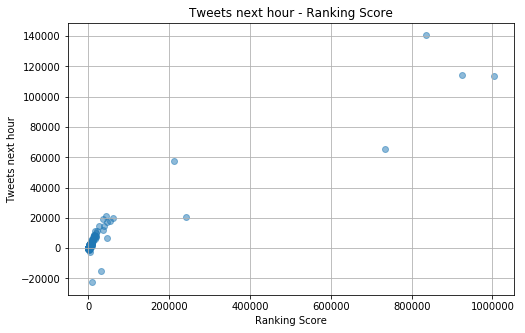

In [59]:
superbowl_top = top_features(p_superbowl_v2)

scatter_plot(time_windows_superbowl_v2[0:-1,superbowl_top],
             superbowl_predict_v2,
             "#superbowl",
             [feature_names[i] for i in superbowl_top])

## Question 6:
Define 3 time periods and corresponding window length as follows:

1. Before Feb.1, 8:00 a.m.: 1-hour window
2. Between Feb.1, 8:00 a.m. and 8:00 p.m.: 5-minute window
3. After Feb.1, 8:00 p.m.: 1-hour window

For each hashtag, trian 3 regression models. Report the MSE and R-squared score for each case.

In [60]:
import time

pst_tz = pytz.timezone('America/Los_Angeles')

key_time1 = datetime.datetime(2015, 2, 1, 8, 0, 0, 0, pst_tz)
key_time1_unix = time.mktime(key_time1.timetuple())

key_time2 = datetime.datetime(2015, 2, 1, 20, 0, 0, 0, pst_tz)
key_time2_unix = time.mktime(key_time2.timetuple())

print("unix time for Feb.1, 8:00 a.m.:", key_time1_unix)
print("unix time for Feb.1, 8:00 p.m.:", key_time2_unix)

unix time for Feb.1, 8:00 a.m.: 1422806400.0
unix time for Feb.1, 8:00 p.m.: 1422849600.0


In [61]:
# use the same features in Question 3

def extract_feature_v3(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = max_times[filename]
        min_time = min_times[filename]
        
        total_windows_before = mt.floor((key_time1_unix - min_time) / (60 * 60)) + 1
        total_windows_between = mt.floor((key_time2_unix - key_time1_unix) / (60 * 5)) + 1
        total_windows_after = mt.floor((max_time - key_time2_unix) / (60 * 60)) + 1
        
        num_tweets = 0
        num_retweets = 0
        num_followers = 0
        max_num_followers = 0
        time_window_before = []
        time_window_between = []
        time_window_after = []
        
        for index in range(total_windows_before):
            datetime_object_in_pst_timezone = datetime.datetime.fromtimestamp(min_time + index * 60 * 60, pst_tz)
            time_of_day = datetime_object_in_pst_timezone.hour
            time_window_before.append([num_tweets, num_retweets, num_followers, max_num_followers, time_of_day])
            
        for index in range(total_windows_between):
            datetime_object_in_pst_timezone = datetime.datetime.fromtimestamp(key_time1_unix + index * 60 * 5, pst_tz)
            time_of_day = datetime_object_in_pst_timezone.hour
            time_window_between.append([num_tweets, num_retweets, num_followers, max_num_followers, time_of_day])
            
        for index in range(total_windows_after):
            datetime_object_in_pst_timezone = datetime.datetime.fromtimestamp(key_time2_unix + index * 60 * 60, pst_tz)
            time_of_day = datetime_object_in_pst_timezone.hour
            time_window_after.append([num_tweets, num_retweets, num_followers, max_num_followers, time_of_day])
            
        for line in lines:
            json_obj = json.loads(line)
            time = json_obj['citation_date']
            
            if time < key_time1_unix:
                index = mt.floor((json_obj['citation_date'] - min_time) / (60 * 60))
                time_window_before[index][0] = time_window_before[index][0] + 1
                time_window_before[index][1] = time_window_before[index][1] + json_obj['metrics']['citations']['total']
                time_window_before[index][2] = time_window_before[index][2] + json_obj['author']['followers']
                time_window_before[index][3] = max(time_window_before[index][3], json_obj['author']['followers'])
            elif time < key_time2_unix:
                index = mt.floor((json_obj['citation_date'] - key_time1_unix) / (60 * 5))
                time_window_between[index][0] = time_window_between[index][0] + 1
                time_window_between[index][1] = time_window_between[index][1] + json_obj['metrics']['citations']['total']
                time_window_between[index][2] = time_window_between[index][2] + json_obj['author']['followers']
                time_window_between[index][3] = max(time_window_between[index][3], json_obj['author']['followers'])
            else:
                index = mt.floor((json_obj['citation_date'] - key_time2_unix) / (60 * 60))
                time_window_after[index][0] = time_window_after[index][0] + 1
                time_window_after[index][1] = time_window_after[index][1] + json_obj['metrics']['citations']['total']
                time_window_after[index][2] = time_window_after[index][2] + json_obj['author']['followers']
                time_window_after[index][3] = max(time_window_after[index][3], json_obj['author']['followers'])

        return np.array(time_window_before), np.array(time_window_between), np.array(time_window_after)

### Gohawks

In [62]:
time_window_before_gohawks, time_window_between_gohawks, time_window_after_gohawks = extract_feature_v3(files[0])

gohawks_X_before = time_window_before_gohawks[0:-1,:]
gohawks_Y_before = time_window_before_gohawks[1:,0]

gohawks_X_between = time_window_between_gohawks[0:-1,:]
gohawks_Y_between = time_window_between_gohawks[1:,0]

gohawks_X_after = time_window_after_gohawks[0:-1,:]
gohawks_Y_after = time_window_after_gohawks[1:,0]

#### Before

In [63]:
lr_gohawks_before = OLS(gohawks_Y_before, gohawks_X_before).fit()

print(lr_gohawks_before.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     49.60
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           1.37e-40
Time:                        13:22:48   Log-Likelihood:                -3574.4
No. Observations:                 439   AIC:                             7159.
Df Residuals:                     434   BIC:                             7179.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.3882      0.269      8.871      0.0

In [64]:
gohawks_predict_before = lr_gohawks_before.predict(gohawks_X_before)
gohawks_mse_before = tools.eval_measures.mse(gohawks_Y_before, gohawks_predict_before)

print("MSE for #gohawks before Feb.1 8:00 a.m.:", gohawks_mse_before)

MSE for #gohawks before Feb.1 8:00 a.m.: 691199.1944325072


#### Between

In [65]:
lr_gohawks_between = OLS(gohawks_Y_between, gohawks_X_between).fit()

print(lr_gohawks_between.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     87.36
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           3.76e-41
Time:                        13:22:48   Log-Likelihood:                -1009.9
No. Observations:                 144   AIC:                             2030.
Df Residuals:                     139   BIC:                             2045.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7286      0.211      3.452      0.0

In [66]:
gohawks_predict_between = lr_gohawks_between.predict(gohawks_X_between)
gohawks_mse_between = tools.eval_measures.mse(gohawks_Y_between, gohawks_predict_between)

print("MSE for #gohawks between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.:", gohawks_mse_between)

MSE for #gohawks between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.: 72273.9320110558


#### After

In [67]:
lr_gohawks_after = OLS(gohawks_Y_after, gohawks_X_after).fit()

print(lr_gohawks_after.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     130.4
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           5.39e-47
Time:                        13:22:48   Log-Likelihood:                -655.38
No. Observations:                 126   AIC:                             1321.
Df Residuals:                     121   BIC:                             1335.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1830      0.111      1.644      0.1

In [68]:
gohawks_predict_after = lr_gohawks_after.predict(gohawks_X_after)
gohawks_mse_after = tools.eval_measures.mse(gohawks_Y_after, gohawks_predict_after)

print("MSE for #gohawks after Feb.1 8:00 p.m.:", gohawks_mse_after)

MSE for #gohawks after Feb.1 8:00 p.m.: 1929.283231599738


### Gopatriots

In [69]:
time_window_before_gopatriots, time_window_between_gopatriots, time_window_after_gopatriots = extract_feature_v3(files[1])

gopatriots_X_before = time_window_before_gopatriots[0:-1,:]
gopatriots_Y_before = time_window_before_gopatriots[1:,0]

gopatriots_X_between = time_window_between_gopatriots[0:-1,:]
gopatriots_Y_between = time_window_between_gopatriots[1:,0]

gopatriots_X_after = time_window_after_gopatriots[0:-1,:]
gopatriots_Y_after = time_window_after_gopatriots[1:,0]

#### Before

In [70]:
lr_gopatriots_before = OLS(gopatriots_Y_before, gopatriots_X_before).fit()

print(lr_gopatriots_before.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     309.6
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          1.81e-140
Time:                        13:22:51   Log-Likelihood:                -2133.2
No. Observations:                 438   AIC:                             4276.
Df Residuals:                     433   BIC:                             4297.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.2239      0.171     24.755      0.0

In [71]:
gopatriots_predict_before = lr_gopatriots_before.predict(gopatriots_X_before)
gopatriots_mse_before = tools.eval_measures.mse(gopatriots_Y_before, gopatriots_predict_before)

print("MSE for #gopatriots before Feb.1 8:00 a.m.:", gopatriots_mse_before)

MSE for #gopatriots before Feb.1 8:00 a.m.: 994.987822738404


#### Between

In [72]:
lr_gopatriots_between = OLS(gopatriots_Y_between, gopatriots_X_between).fit()

print(lr_gopatriots_between.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     49.47
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           3.23e-29
Time:                        13:22:51   Log-Likelihood:                -892.05
No. Observations:                 144   AIC:                             1794.
Df Residuals:                     139   BIC:                             1809.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1181      0.350     -0.337      0.7

In [73]:
gopatriots_predict_between = lr_gopatriots_between.predict(gopatriots_X_between)
gopatriots_mse_between = tools.eval_measures.mse(gopatriots_Y_between, gopatriots_predict_between)

print("MSE for #gopatriots between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.:", gopatriots_mse_between)

MSE for #gopatriots between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.: 14069.103324160977


#### After

In [74]:
lr_gopatriots_after = OLS(gopatriots_Y_after, gopatriots_X_after).fit()

print(lr_gopatriots_after.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     79.23
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           4.65e-36
Time:                        13:22:51   Log-Likelihood:                -410.28
No. Observations:                 123   AIC:                             830.6
Df Residuals:                     118   BIC:                             844.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8779      0.155      5.650      0.0

In [75]:
gopatriots_predict_after = lr_gopatriots_after.predict(gopatriots_X_after)
gopatriots_mse_after = tools.eval_measures.mse(gopatriots_Y_after, gopatriots_predict_after)

print("MSE for #gopatriots after Feb.1 8:00 p.m.:", gopatriots_mse_after)

MSE for #gopatriots after Feb.1 8:00 p.m.: 46.21994645208551


### nfl

In [76]:
time_window_before_nfl, time_window_between_nfl, time_window_after_nfl = extract_feature_v3(files[2])

nfl_X_before = time_window_before_nfl[0:-1,:]
nfl_Y_before = time_window_before_nfl[1:,0]

nfl_X_between = time_window_between_nfl[0:-1,:]
nfl_Y_between = time_window_between_nfl[1:,0]

nfl_X_after = time_window_after_nfl[0:-1,:]
nfl_Y_after = time_window_after_nfl[1:,0]

### Before

In [77]:
lr_nfl_before = OLS(nfl_Y_before, nfl_X_before).fit()

print(lr_nfl_before.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     180.5
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          1.35e-103
Time:                        13:23:19   Log-Likelihood:                -3066.9
No. Observations:                 439   AIC:                             6144.
Df Residuals:                     434   BIC:                             6164.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5493      0.101      5.438      0.0

In [78]:
nfl_predict_before = lr_nfl_before.predict(nfl_X_before)
nfl_mse_before = tools.eval_measures.mse(nfl_Y_before, nfl_predict_before)

print("MSE for #nfl before Feb.1 8:00 a.m.:", nfl_mse_before)

MSE for #nfl before Feb.1 8:00 a.m.: 68468.41207023825


#### Between

In [79]:
lr_nfl_between = OLS(nfl_Y_between, nfl_X_between).fit()

print(lr_nfl_between.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     261.6
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           7.45e-69
Time:                        13:23:19   Log-Likelihood:                -921.74
No. Observations:                 144   AIC:                             1853.
Df Residuals:                     139   BIC:                             1868.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2057      0.112     10.754      0.0

In [80]:
nfl_predict_between = lr_nfl_between.predict(nfl_X_between)
nfl_mse_between = tools.eval_measures.mse(nfl_Y_between, nfl_predict_between)

print("MSE for #nfl between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.:", nfl_mse_between)

MSE for #nfl between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.: 21248.028536495913


#### After

In [81]:
lr_nfl_after = OLS(nfl_Y_after, nfl_X_after).fit()

print(lr_nfl_after.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     434.4
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           7.17e-79
Time:                        13:23:19   Log-Likelihood:                -845.97
No. Observations:                 134   AIC:                             1702.
Df Residuals:                     129   BIC:                             1716.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0651      0.102     10.394      0.0

In [82]:
nfl_predict_after = lr_nfl_after.predict(nfl_X_after)
nfl_mse_after = tools.eval_measures.mse(nfl_Y_after, nfl_predict_after)

print("MSE for #nfl after Feb.1 8:00 p.m.:", nfl_mse_after)

MSE for #nfl after Feb.1 8:00 p.m.: 17827.58476078192


### Patriots

In [83]:
time_window_before_patriots, time_window_between_patriots, time_window_after_patriots = extract_feature_v3(files[3])

patriots_X_before = time_window_before_patriots[0:-1,:]
patriots_Y_before = time_window_before_patriots[1:,0]

patriots_X_between = time_window_between_patriots[0:-1,:]
patriots_Y_between = time_window_between_patriots[1:,0]

patriots_X_after = time_window_after_patriots[0:-1,:]
patriots_Y_after = time_window_after_patriots[1:,0]

### Before

In [84]:
lr_patriots_before = OLS(patriots_Y_before, patriots_X_before).fit()

print(lr_patriots_before.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     106.1
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           5.69e-73
Time:                        13:24:08   Log-Likelihood:                -3474.0
No. Observations:                 439   AIC:                             6958.
Df Residuals:                     434   BIC:                             6978.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5313      0.208     -2.558      0.0

In [85]:
patriots_predict_before = lr_patriots_before.predict(patriots_X_before)
patriots_mse_before = tools.eval_measures.mse(patriots_Y_before, patriots_predict_before)

print("MSE for #patriots before Feb.1 8:00 a.m.:", patriots_mse_before)

MSE for #patriots before Feb.1 8:00 a.m.: 437563.97152427776


#### Between

In [86]:
lr_patriots_between = OLS(patriots_Y_between, patriots_X_between).fit()

print(lr_patriots_between.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     222.9
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           1.57e-64
Time:                        13:24:08   Log-Likelihood:                -1170.8
No. Observations:                 144   AIC:                             2352.
Df Residuals:                     139   BIC:                             2366.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9338      0.249      3.753      0.0

In [87]:
patriots_predict_between = lr_patriots_between.predict(patriots_X_between)
patriots_mse_between = tools.eval_measures.mse(patriots_Y_between, patriots_predict_between)

print("MSE for #patriots between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.:", patriots_mse_between)

MSE for #patriots between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.: 675398.3798999317


#### After

In [88]:
lr_patriots_after = OLS(patriots_Y_after, patriots_X_after).fit()

print(lr_patriots_after.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     242.0
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           9.83e-64
Time:                        13:24:08   Log-Likelihood:                -815.48
No. Observations:                 134   AIC:                             1641.
Df Residuals:                     129   BIC:                             1655.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7844      0.091      8.647      0.0

In [89]:
patriots_predict_after = lr_patriots_after.predict(patriots_X_after)
patriots_mse_after = tools.eval_measures.mse(patriots_Y_after, patriots_predict_after)

print("MSE for #patriots after Feb.1 8:00 p.m.:", patriots_mse_after)

MSE for #patriots after Feb.1 8:00 p.m.: 11310.41296170774


### sb49

In [90]:
time_window_before_sb49, time_window_between_sb49, time_window_after_sb49 = extract_feature_v3(files[4])

sb49_X_before = time_window_before_sb49[0:-1,:]
sb49_Y_before = time_window_before_sb49[1:,0]

sb49_X_between = time_window_between_sb49[0:-1,:]
sb49_Y_between = time_window_between_sb49[1:,0]

sb49_X_after = time_window_after_sb49[0:-1,:]
sb49_Y_after = time_window_after_sb49[1:,0]

#### Before

In [91]:
lr_sb49_before = OLS(sb49_Y_before, sb49_X_before).fit()

print(lr_sb49_before.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     503.7
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          3.27e-177
Time:                        13:25:34   Log-Likelihood:                -2582.0
No. Observations:                 435   AIC:                             5174.
Df Residuals:                     430   BIC:                             5194.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7874      0.038     20.992      0.0

In [92]:
sb49_predict_before = lr_sb49_before.predict(sb49_X_before)
sb49_mse_before = tools.eval_measures.mse(sb49_Y_before, sb49_predict_before)

print("MSE for #sb49 before Feb.1 8:00 a.m.:", sb49_mse_before)

MSE for #sb49 before Feb.1 8:00 a.m.: 8377.93445076474


#### Between

In [93]:
lr_sb49_between = OLS(sb49_Y_between, sb49_X_between).fit()

print(lr_sb49_between.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     605.5
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           1.87e-92
Time:                        13:25:34   Log-Likelihood:                -1218.4
No. Observations:                 144   AIC:                             2447.
Df Residuals:                     139   BIC:                             2462.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9794      0.055     17.897      0.0

In [94]:
sb49_predict_between = lr_sb49_between.predict(sb49_X_between)
sb49_mse_between = tools.eval_measures.mse(sb49_Y_between, sb49_predict_between)

print("MSE for #sb49 between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.:", sb49_mse_between)

MSE for #sb49 between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.: 1308715.6752085655


#### After

In [95]:
lr_sb49_after = OLS(sb49_Y_after, sb49_X_after).fit()

print(lr_sb49_after.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     143.1
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           7.25e-51
Time:                        13:25:34   Log-Likelihood:                -943.62
No. Observations:                 134   AIC:                             1897.
Df Residuals:                     129   BIC:                             1912.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7306      0.091      8.017      0.0

In [96]:
sb49_predict_after = lr_sb49_after.predict(sb49_X_after)
sb49_mse_after = tools.eval_measures.mse(sb49_Y_after, sb49_predict_after)

print("MSE for #sb49 after Feb.1 8:00 p.m.:", sb49_mse_after)

MSE for #sb49 after Feb.1 8:00 p.m.: 76572.48128151654


### Superbowl

In [97]:
time_window_before_superbowl, time_window_between_superbowl, time_window_after_superbowl = extract_feature_v3(files[5])

superbowl_X_before = time_window_before_superbowl[0:-1,:]
superbowl_Y_before = time_window_before_superbowl[1:,0]

superbowl_X_between = time_window_between_superbowl[0:-1,:]
superbowl_Y_between = time_window_between_superbowl[1:,0]

superbowl_X_after = time_window_after_superbowl[0:-1,:]
superbowl_Y_after = time_window_after_superbowl[1:,0]

#### Before

In [98]:
lr_superbowl_before = OLS(superbowl_Y_before, superbowl_X_before).fit()

print(lr_superbowl_before.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     71.61
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           1.49e-54
Time:                        13:27:56   Log-Likelihood:                -3541.9
No. Observations:                 439   AIC:                             7094.
Df Residuals:                     434   BIC:                             7114.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3628      0.132      2.749      0.0

In [99]:
superbowl_predict_before = lr_superbowl_before.predict(superbowl_X_before)
superbowl_mse_before = tools.eval_measures.mse(superbowl_Y_before, superbowl_predict_before)

print("MSE for #superbowl before Feb.1 8:00 a.m.:", superbowl_mse_before)

MSE for #superbowl before Feb.1 8:00 a.m.: 596071.1910850748


#### Between

In [100]:
lr_superbowl_between = OLS(superbowl_Y_between, superbowl_X_between).fit()

print(lr_superbowl_between.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     393.2
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           3.82e-80
Time:                        13:27:56   Log-Likelihood:                -1337.4
No. Observations:                 144   AIC:                             2685.
Df Residuals:                     139   BIC:                             2700.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0569      0.089     11.879      0.0

In [101]:
superbowl_predict_between = lr_superbowl_between.predict(superbowl_X_between)
superbowl_mse_between = tools.eval_measures.mse(superbowl_Y_between, superbowl_predict_between)

print("MSE for #superbowl between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.:", superbowl_mse_between)

MSE for #superbowl between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.: 6827830.019039274


#### After

In [102]:
lr_superbowl_after = OLS(superbowl_Y_after, superbowl_X_after).fit()

print(lr_superbowl_after.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     241.0
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           1.26e-63
Time:                        13:27:57   Log-Likelihood:                -970.60
No. Observations:                 134   AIC:                             1951.
Df Residuals:                     129   BIC:                             1966.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9801      0.097     10.129      0.0

In [103]:
superbowl_predict_after = lr_superbowl_after.predict(superbowl_X_after)
superbowl_mse_after = tools.eval_measures.mse(superbowl_Y_after, superbowl_predict_after)

print("MSE for #superbowl after Feb.1 8:00 p.m.:", superbowl_mse_after)

MSE for #superbowl after Feb.1 8:00 p.m.: 114533.04719882182


## Question 7:
Aggregate the data of all hashtags, and train 3 models for the same intervals in Question 6 to predict the number of tweets in the next time interval on the aggregated data.

In [104]:
# use the same features in Question 3

def extract_feature_agg(filenames):
    
    max_time = 0
    min_time = 2000000000
    for filename in filenames:
        if max_times[filename] > max_time:
            max_time = max_times[filename]
        if min_times[filename] < min_time:
            min_time = min_times[filename]
    
    total_windows_before = mt.floor((key_time1_unix - min_time) / (60 * 60)) + 1
    total_windows_between = mt.floor((key_time2_unix - key_time1_unix) / (60 * 5)) + 1
    total_windows_after = mt.floor((max_time - key_time2_unix) / (60 * 60)) + 1

    num_tweets = 0
    num_retweets = 0
    num_followers = 0
    max_num_followers = 0
    time_window_before = []
    time_window_between = []
    time_window_after = []
    
    for index in range(total_windows_before):
        datetime_object_in_pst_timezone = datetime.datetime.fromtimestamp(min_time + index * 60 * 60, pst_tz)
        time_of_day = datetime_object_in_pst_timezone.hour
        time_window_before.append([num_tweets, num_retweets, num_followers, max_num_followers, time_of_day])

    for index in range(total_windows_between):
        datetime_object_in_pst_timezone = datetime.datetime.fromtimestamp(key_time1_unix + index * 60 * 5, pst_tz)
        time_of_day = datetime_object_in_pst_timezone.hour
        time_window_between.append([num_tweets, num_retweets, num_followers, max_num_followers, time_of_day])

    for index in range(total_windows_after):
        datetime_object_in_pst_timezone = datetime.datetime.fromtimestamp(key_time2_unix + index * 60 * 60, pst_tz)
        time_of_day = datetime_object_in_pst_timezone.hour
        time_window_after.append([num_tweets, num_retweets, num_followers, max_num_followers, time_of_day])
    
    for filename in filenames:
        with open(filename, 'r') as file:
            lines = file.readlines()

            for line in lines:
                json_obj = json.loads(line)
                time = json_obj['citation_date']

                if time < key_time1_unix:
                    index = mt.floor((json_obj['citation_date'] - min_time) / (60 * 60))
                    time_window_before[index][0] = time_window_before[index][0] + 1
                    time_window_before[index][1] = time_window_before[index][1] + json_obj['metrics']['citations']['total']
                    time_window_before[index][2] = time_window_before[index][2] + json_obj['author']['followers']
                    time_window_before[index][3] = max(time_window_before[index][3], json_obj['author']['followers'])
                elif time < key_time2_unix:
                    index = mt.floor((json_obj['citation_date'] - key_time1_unix) / (60 * 5))
                    time_window_between[index][0] = time_window_between[index][0] + 1
                    time_window_between[index][1] = time_window_between[index][1] + json_obj['metrics']['citations']['total']
                    time_window_between[index][2] = time_window_between[index][2] + json_obj['author']['followers']
                    time_window_between[index][3] = max(time_window_between[index][3], json_obj['author']['followers'])
                else:
                    index = mt.floor((json_obj['citation_date'] - key_time2_unix) / (60 * 60))
                    time_window_after[index][0] = time_window_after[index][0] + 1
                    time_window_after[index][1] = time_window_after[index][1] + json_obj['metrics']['citations']['total']
                    time_window_after[index][2] = time_window_after[index][2] + json_obj['author']['followers']
                    time_window_after[index][3] = max(time_window_after[index][3], json_obj['author']['followers'])

    return np.array(time_window_before), np.array(time_window_between), np.array(time_window_after)

In [105]:
time_window_before_agg, time_window_between_agg, time_window_after_agg = extract_feature_agg(files)

agg_X_before = time_window_before_agg[0:-1,:]
agg_Y_before = time_window_before_agg[1:,0]

agg_X_between = time_window_between_agg[0:-1,:]
agg_Y_between = time_window_between_agg[1:,0]

agg_X_after = time_window_after_agg[0:-1,:]
agg_Y_after = time_window_after_agg[1:,0]

#### Before

In [106]:
lr_agg_before = OLS(agg_Y_before, agg_X_before).fit()

print(lr_agg_before.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     94.80
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           2.47e-67
Time:                        13:33:53   Log-Likelihood:                -3985.0
No. Observations:                 439   AIC:                             7980.
Df Residuals:                     434   BIC:                             8000.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6298      0.143      4.413      0.0

In [107]:
agg_predict_before = lr_agg_before.predict(agg_X_before)
agg_mse_before = tools.eval_measures.mse(agg_Y_before, agg_predict_before)

print("MSE for aggregated data before Feb.1 8:00 a.m.:", agg_mse_before)

MSE for aggregated data before Feb.1 8:00 a.m.: 4488914.282077933


#### Between

In [108]:
lr_agg_between = OLS(agg_Y_between, agg_X_between).fit()

print(lr_agg_between.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     456.4
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           2.33e-84
Time:                        13:33:53   Log-Likelihood:                -1404.3
No. Observations:                 144   AIC:                             2819.
Df Residuals:                     139   BIC:                             2834.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9952      0.078     12.793      0.0

In [109]:
agg_predict_between = lr_agg_between.predict(agg_X_between)
agg_mse_between = tools.eval_measures.mse(agg_Y_between, agg_predict_between)

print("MSE for aggregated data between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.:", agg_mse_between)

MSE for aggregated data between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.: 17307835.23344915


#### After

In [110]:
lr_agg_after = OLS(agg_Y_after, agg_X_after).fit()

print(lr_agg_after.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     318.7
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           8.95e-71
Time:                        13:33:53   Log-Likelihood:                -1064.9
No. Observations:                 134   AIC:                             2140.
Df Residuals:                     129   BIC:                             2154.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8077      0.101      8.027      0.0

In [111]:
agg_predict_after = lr_agg_after.predict(agg_X_after)
agg_mse_after = tools.eval_measures.mse(agg_Y_after, agg_predict_after)

print("MSE for aggregated data after Feb.1 8:00 p.m.:", agg_mse_after)

MSE for aggregated data after Feb.1 8:00 p.m.: 467720.1187003899


## Question 8:
Use grid search to find the best parameter set for RandomForestRegressor and GradientBoostingRegressor respectively. Use the following param_grid:
- 'max_depth': \[10, 20, 40, 60, 80, 100, 200, None\],
- 'max_features': \['auto', 'sqrt'\],
- 'min_samples_leaf': \[1, 2, 4\],
- 'min_samples_split': \[2, 5, 10\],
- 'n_estimators': \[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000\]

Set cv = KFold(5, shuffle=True), scoring='neg_mean_squared_error' for the grid search. Analyze the result of the grid search. Do the test errors from cross-validation look good? If not,
please explain the reason.

In [112]:
# use the same features in Question 3

def extract_feature_agg_v0(filenames):
    
    max_time = 0
    min_time = 2000000000
    for filename in filenames:
        if max_times[filename] > max_time:
            max_time = max_times[filename]
        if min_times[filename] < min_time:
            min_time = min_times[filename]
    
    total_windows = mt.floor((max_time - min_time) / (60 * 60)) + 1

    num_tweets = 0
    num_retweets = 0
    num_followers = 0
    max_num_followers = 0
    time_window = []
    
    for index in range(total_windows):
        datetime_object_in_pst_timezone = datetime.datetime.fromtimestamp(min_time + index * 60 * 60, pst_tz)
        time_of_day = datetime_object_in_pst_timezone.hour
        time_window.append([num_tweets, num_retweets, num_followers, max_num_followers, time_of_day])
    
    for filename in filenames:
        with open(filename, 'r') as file:
            lines = file.readlines()

            for line in lines:
                json_obj = json.loads(line)
                time = json_obj['citation_date']

                index = mt.floor((json_obj['citation_date'] - min_time) / (60 * 60))
                time_window[index][0] = time_window[index][0] + 1
                time_window[index][1] = time_window[index][1] + json_obj['metrics']['citations']['total']
                time_window[index][2] = time_window[index][2] + json_obj['author']['followers']
                time_window[index][3] = max(time_window[index][3], json_obj['author']['followers'])

    return np.array(time_window)

In [113]:
params = {
    'max_depth': [10, 20, 40, 60, 80, 100, 200, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000,
                    1200, 1400, 1600, 1800, 2000]
}

In [114]:
time_window_agg = extract_feature_agg_v0(files)

agg_X = time_window_agg[0:-1,:]
agg_Y = time_window_agg[1:,0]

#### Grid search for RandomForestRegressor

In [115]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

cv = KFold(5, shuffle=True)

random_forest_grid = GridSearchCV(estimator = RandomForestRegressor(n_jobs = -1),
                                  param_grid = params,
                                  scoring = "neg_mean_squared_error",
                                  cv = cv,
                                  n_jobs = -1)

random_forest_grid.fit(agg_X, agg_Y)

print('-' * 20, 'Best Params', '-' * 20)
print(random_forest_grid.best_params_)
print('-' * 20, 'Best Score', '-' * 20)
print(random_forest_grid.best_score_)

D:\Installation\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


-------------------- Best Params --------------------
{'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
-------------------- Best Score --------------------
-270334639.0866861


In [116]:
rfr_best = random_forest_grid.best_params_

random_forest_best = RandomForestRegressor(max_depth = rfr_best['max_depth'],
                                           max_features = rfr_best['max_features'],
                                           min_samples_leaf = rfr_best['min_samples_leaf'],
                                           min_samples_split = rfr_best['min_samples_split'],
                                           n_estimators = rfr_best['n_estimators'])

random_forest_best.fit(agg_X, agg_Y)

print("Metrics for Random Forest with best params found")
print("R-squared:", random_forest_best.score(agg_X, agg_Y))
print("MSE:", random_forest_grid.best_score_)

Metrics for Random Forest with best params found
R-squared: 0.9524338721680856
MSE: -270334639.0866861


#### Grid Search for GradientBoostingRegressor

In [117]:
from sklearn.ensemble import GradientBoostingRegressor

cv = KFold(5, shuffle=True)

gradient_boosting_grid = GridSearchCV(estimator = GradientBoostingRegressor(),
                                      param_grid = params,
                                      scoring = "neg_mean_squared_error",
                                      cv = cv,
                                      n_jobs = -1)

gradient_boosting_grid.fit(agg_X, agg_Y)

print('-' * 20, 'Best Params', '-' * 20)
print(gradient_boosting_grid.best_params_)
print('-' * 20, 'Best Score', '-' * 20)
print(gradient_boosting_grid.best_score_)

D:\Installation\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


-------------------- Best Params --------------------
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1200}
-------------------- Best Score --------------------
-303882598.3681023


In [118]:
gbr_best = gradient_boosting_grid.best_params_

gradient_boosting_best = GradientBoostingRegressor(max_depth = gbr_best['max_depth'],
                                                   max_features = gbr_best['max_features'],
                                                   min_samples_leaf = gbr_best['min_samples_leaf'],
                                                   min_samples_split = gbr_best['min_samples_split'],
                                                   n_estimators = gbr_best['n_estimators'])

gradient_boosting_best.fit(agg_X, agg_Y)

print("Metrics for Gradient Boosting with best params found")
print("R-squared:", gradient_boosting_best.score(agg_X, agg_Y))
print("MSE:", gradient_boosting_grid.best_score_)

Metrics for Gradient Boosting with best params found
R-squared: 0.9999999999999999
MSE: -303882598.3681023


## Question 9:
Compare the best estimator you found in the grid search with OLS on the entire dataset.

In [119]:
# OLS on the entire dataset

lr_agg = OLS(agg_Y, agg_X).fit()

print(lr_agg.summary())

agg_predict = lr_agg.predict(agg_X)
agg_mse = tools.eval_measures.mse(agg_Y, agg_predict)

print("MSE for aggregated data:", agg_mse)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     558.8
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          3.07e-219
Time:                        15:03:13   Log-Likelihood:                -6329.4
No. Observations:                 586   AIC:                         1.267e+04
Df Residuals:                     581   BIC:                         1.269e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.6582      0.070     23.828      0.0

## Question 10:
For each time period described in Question 6, perform the same grid search above for GradientBoostingRegressor (with corresponding time window length). Does the cross- validation test error change? Are the best parameter set you find in each period agree with those you found above?

### Grid Search before Feb.1 8:00 a.m.

In [120]:
cv = KFold(5, shuffle=True)

gradient_boosting_grid_before = GridSearchCV(estimator = GradientBoostingRegressor(),
                                             param_grid = params,
                                             scoring = "neg_mean_squared_error",
                                             cv = cv,
                                             n_jobs = -1)

gradient_boosting_grid_before.fit(agg_X_before, agg_Y_before)

print('-' * 20, 'Best Params', '-' * 20)
print(gradient_boosting_grid_before.best_params_)
print('-' * 20, 'Best Score', '-' * 20)
print(gradient_boosting_grid_before.best_score_)

D:\Installation\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


-------------------- Best Params --------------------
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}
-------------------- Best Score --------------------
-3972292.1660991865


In [121]:
gbr_before = gradient_boosting_grid_before.best_params_

gradient_boosting_best_before = GradientBoostingRegressor(max_depth = gbr_before['max_depth'],
                                                          max_features = gbr_before['max_features'],
                                                          min_samples_leaf = gbr_before['min_samples_leaf'],
                                                          min_samples_split = gbr_before['min_samples_split'],
                                                          n_estimators = gbr_before['n_estimators'])

gradient_boosting_best_before.fit(agg_X_before, agg_Y_before)

print("Metrics for Gradient Boosting with best params found")
print("R-squared:", gradient_boosting_best_before.score(agg_X_before, agg_Y_before))
print("MSE:", gradient_boosting_grid_before.best_score_)

Metrics for Gradient Boosting with best params found
R-squared: 0.9999999999999867
MSE: -3972292.1660991865


#### Grid Search between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.

In [122]:
cv = KFold(5, shuffle=True)

gradient_boosting_grid_between = GridSearchCV(estimator = GradientBoostingRegressor(),
                                              param_grid = params,
                                              scoring = "neg_mean_squared_error",
                                              cv = cv,
                                              n_jobs = -1)

gradient_boosting_grid_between.fit(agg_X_between, agg_Y_between)

print('-' * 20, 'Best Params', '-' * 20)
print(gradient_boosting_grid_between.best_params_)
print('-' * 20, 'Best Score', '-' * 20)
print(gradient_boosting_grid_between.best_score_)

-------------------- Best Params --------------------
{'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
-------------------- Best Score --------------------
-24930238.746718857


D:\Installation\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [123]:
gbr_between = gradient_boosting_grid_between.best_params_

gradient_boosting_best_between = GradientBoostingRegressor(max_depth = gbr_between['max_depth'],
                                                           max_features = gbr_between['max_features'],
                                                           min_samples_leaf = gbr_between['min_samples_leaf'],
                                                           min_samples_split = gbr_between['min_samples_split'],
                                                           n_estimators = gbr_between['n_estimators'])

gradient_boosting_best_between.fit(agg_X_between, agg_Y_between)

print("Metrics for Gradient Boosting with best params found")
print("R-squared:", gradient_boosting_best_between.score(agg_X_between, agg_Y_between))
print("MSE:", gradient_boosting_grid_between.best_score_)

Metrics for Gradient Boosting with best params found
R-squared: 0.9999999999999991
MSE: -24930238.746718857


#### Grid Search after Feb.1 8:00 p.m.

In [124]:
cv = KFold(5, shuffle=True)

gradient_boosting_grid_after = GridSearchCV(estimator = GradientBoostingRegressor(),
                                            param_grid = params,
                                            scoring = "neg_mean_squared_error",
                                            cv = cv,
                                            n_jobs = -1)

gradient_boosting_grid_after.fit(agg_X_after, agg_Y_after)

print('-' * 20, 'Best Params', '-' * 20)
print(gradient_boosting_grid_after.best_params_)
print('-' * 20, 'Best Score', '-' * 20)
print(gradient_boosting_grid_after.best_score_)

D:\Installation\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


-------------------- Best Params --------------------
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 1000}
-------------------- Best Score --------------------
-333902.3910500643


In [125]:
gbr_after = gradient_boosting_grid_after.best_params_

gradient_boosting_best_after = GradientBoostingRegressor(max_depth = gbr_after['max_depth'],
                                                         max_features = gbr_after['max_features'],
                                                         min_samples_leaf = gbr_after['min_samples_leaf'],
                                                         min_samples_split = gbr_after['min_samples_split'],
                                                         n_estimators = gbr_after['n_estimators'])

gradient_boosting_best_after.fit(agg_X_after, agg_Y_after)

print("Metrics for Gradient Boosting with best params found")
print("R-squared:", gradient_boosting_best_after.score(agg_X_after, agg_Y_after))
print("MSE:", gradient_boosting_grid_after.best_score_)

Metrics for Gradient Boosting with best params found
R-squared: 0.9999999999563042
MSE: -333902.3910500643


## Question 11:
Now try to regress the aggregated data with MLPRegressor. Try different architectures (i.e. the structure of the network) by adjusting hidden_layer_sizes. You should try at least 5 architectures with various numbers of layers and layer sizes. Report the architectures you tried, as well as its MSE of fitting the entire aggregated data.

#### Structure 1
- One layer of size 10

In [126]:
from sklearn.neural_network import MLPRegressor

mlpr1 = MLPRegressor(hidden_layer_sizes = (10))
mlpr1.fit(agg_X, agg_Y)

mlpr1_y_pred = mlpr1.predict(agg_X)

In [127]:
from sklearn.metrics import mean_squared_error

mlpr1_mse = mean_squared_error(agg_Y, mlpr1_y_pred)

print("MSE for MLPRegressor with Structure 1:", mlpr1_mse)

MSE for MLPRegressor with Structure 1: 40994919394.45372


### Structure 2
- 1st layer of size 10
- 2nd layer of size 10

In [128]:
mlpr2 = MLPRegressor(hidden_layer_sizes = (10, 10))
mlpr2.fit(agg_X, agg_Y)

mlpr2_y_pred = mlpr2.predict(agg_X)

In [129]:
mlpr2_mse = mean_squared_error(agg_Y, mlpr2_y_pred)

print("MSE for MLPRegressor with Structure 2:", mlpr2_mse)

MSE for MLPRegressor with Structure 2: 3488706555.6891546


### Structure 3
- 1st layer of size 10
- 2nd layer of size 10
- 3rd layer of size 10

In [130]:
mlpr3 = MLPRegressor(hidden_layer_sizes = (10, 10, 10))
mlpr3.fit(agg_X, agg_Y)

mlpr3_y_pred = mlpr3.predict(agg_X)

In [131]:
mlpr3_mse = mean_squared_error(agg_Y, mlpr3_y_pred)

print("MSE for MLPRegressor with Structure 3:", mlpr3_mse)

MSE for MLPRegressor with Structure 3: 1702431573.7536132


### Structure 4
- 1st layer of size 10
- 2nd layer of size 10
- 3rd layer of size 10
- 4th layer of size 10

In [132]:
mlpr4 = MLPRegressor(hidden_layer_sizes = (10, 10, 10, 10))
mlpr4.fit(agg_X, agg_Y)

mlpr4_y_pred = mlpr4.predict(agg_X)

In [133]:
mlpr4_mse = mean_squared_error(agg_Y, mlpr4_y_pred)

print("MSE for MLPRegressor with Structure 4:", mlpr4_mse)

MSE for MLPRegressor with Structure 4: 5030049024.943863


#### Structure 5
- 1st layer of size 20
- 2nd layer of size 20
- 3rd layer of size 20
- 4th layer of size 20

In [134]:
mlpr5 = MLPRegressor(hidden_layer_sizes = (20, 20, 20, 20))
mlpr5.fit(agg_X, agg_Y)

mlpr5_y_pred = mlpr5.predict(agg_X)

In [135]:
mlpr5_mse = mean_squared_error(agg_Y, mlpr5_y_pred)

print("MSE for MLPRegressor with Structure 5:", mlpr5_mse)

MSE for MLPRegressor with Structure 5: 660028822.5281397


#### Structure 6
- 1st layer of size 10
- 2nd layer of size 10
- 3rd layer of size 10
- 4th layer of size 10
- 5th layer of size 10

In [136]:
mlpr6 = MLPRegressor(hidden_layer_sizes = (10, 10, 10, 10, 10))
mlpr6.fit(agg_X, agg_Y)

mlpr6_y_pred = mlpr6.predict(agg_X)

In [137]:
mlpr6_mse = mean_squared_error(agg_Y, mlpr6_y_pred)

print("MSE for MLPRegressor with Structure 6:", mlpr6_mse)

MSE for MLPRegressor with Structure 6: 391732482498.2709


#### The best structure is Structure 6.

## Question 12:
Use StandardScaler to scale the data before feeding it to MLPRegressor (with the best architecture you got above). Does its performance increase?

In [138]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
std_X = StandardScaler().fit_transform(agg_X, agg_Y)

# We will use Structure 6 here
mlpr6.fit(std_X, agg_Y)
mlpr6_std_pred = mlpr6.predict(std_X)

# See the result of mse
mlpr6_std_mse = mean_squared_error(agg_Y, mlpr6_std_pred)

print("MSE for MLPRegressor with Structure 6 after scaling:", mlpr6_std_mse)

MSE for MLPRegressor with Structure 6 after scaling: 244827156.9917313


## Question 13:
Using grid search, find the best architecture (for scaled data) for each period (with corresponding window length) described in Question 6.

In [139]:
# Scaling the data for each period
std_X_before = StandardScaler().fit_transform(agg_X_before, agg_Y_before)
std_X_between = StandardScaler().fit_transform(agg_X_between, agg_Y_between)
std_X_after = StandardScaler().fit_transform(agg_X_after, agg_Y_after)

params_mlpr = {'hidden_layer_sizes':[(10), (10,10), (10,10,10), (10,10,10,10), (20,20,20,20), (10,10,10,10,10)]} 

### Grid Search before Feb.1 8:00 a.m.

In [140]:
cv = KFold(5, shuffle=True)

std_mlpr_grid_before = GridSearchCV(estimator = MLPRegressor(),
                                    param_grid = params_mlpr,
                                    scoring = "neg_mean_squared_error",
                                    cv = cv,
                                    n_jobs = -1)

std_mlpr_grid_before.fit(std_X_before, agg_Y_before)

print('-' * 20, 'Best Params', '-' * 20)
print(std_mlpr_grid_before.best_params_)
print('-' * 20, 'Best Score', '-' * 20)
print(std_mlpr_grid_before.best_score_)

D:\Installation\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


-------------------- Best Params --------------------
{'hidden_layer_sizes': (10, 10, 10, 10, 10)}
-------------------- Best Score --------------------
-5213594.375574622


### Grid Search between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.

In [141]:
cv = KFold(5, shuffle=True)

std_mlpr_grid_between = GridSearchCV(estimator = MLPRegressor(),
                                    param_grid = params_mlpr,
                                    scoring = "neg_mean_squared_error",
                                    cv = cv,
                                    n_jobs = -1)

std_mlpr_grid_between.fit(std_X_between, agg_Y_between)

print('-' * 20, 'Best Params', '-' * 20)
print(std_mlpr_grid_between.best_params_)
print('-' * 20, 'Best Score', '-' * 20)
print(std_mlpr_grid_between.best_score_)

-------------------- Best Params --------------------
{'hidden_layer_sizes': (20, 20, 20, 20)}
-------------------- Best Score --------------------
-263523420.6867193


D:\Installation\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Grid Search after Feb.1 8:00 p.m.

In [142]:
cv = KFold(5, shuffle=True)

std_mlpr_grid_after = GridSearchCV(estimator = MLPRegressor(),
                                    param_grid = params_mlpr,
                                    scoring = "neg_mean_squared_error",
                                    cv = cv,
                                    n_jobs = -1)

std_mlpr_grid_after.fit(std_X_after, agg_Y_after)

print('-' * 20, 'Best Params', '-' * 20)
print(std_mlpr_grid_after.best_params_)
print('-' * 20, 'Best Score', '-' * 20)
print(std_mlpr_grid_after.best_score_)

-------------------- Best Params --------------------
{'hidden_layer_sizes': (20, 20, 20, 20)}
-------------------- Best Score --------------------
-2207937.717018156


D:\Installation\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Question 14:
Report the model you use. For each test file, provide your predictions on the number of tweets in the next time window.

In [143]:
files = ["ECE219_tweet_data/tweets_#gohawks.txt",
         "ECE219_tweet_data/tweets_#gopatriots.txt",
         "ECE219_tweet_data/tweets_#nfl.txt",
         "ECE219_tweet_data/tweets_#patriots.txt",
         "ECE219_tweet_data/tweets_#sb49.txt",
         "ECE219_tweet_data/tweets_#superbowl.txt"]

test_filenames = ['ECE219_tweet_test/sample0_period1.txt',
                  'ECE219_tweet_test/sample0_period2.txt',
                  'ECE219_tweet_test/sample0_period3.txt',
                  'ECE219_tweet_test/sample1_period1.txt',
                  'ECE219_tweet_test/sample1_period2.txt',
                  'ECE219_tweet_test/sample1_period3.txt',
                  'ECE219_tweet_test/sample2_period1.txt',
                  'ECE219_tweet_test/sample2_period2.txt',
                  'ECE219_tweet_test/sample2_period3.txt']

max_times = {"ECE219_tweet_data/tweets_#gohawks.txt": 0,
             "ECE219_tweet_data/tweets_#gopatriots.txt": 0,
             "ECE219_tweet_data/tweets_#nfl.txt": 0,
             "ECE219_tweet_data/tweets_#patriots.txt": 0,
             "ECE219_tweet_data/tweets_#sb49.txt": 0,
             "ECE219_tweet_data/tweets_#superbowl.txt": 0,
             'ECE219_tweet_test/sample0_period1.txt': 0,
             'ECE219_tweet_test/sample0_period2.txt': 0,
             'ECE219_tweet_test/sample0_period3.txt': 0,
             'ECE219_tweet_test/sample1_period1.txt': 0, 
             'ECE219_tweet_test/sample1_period2.txt': 0,
             'ECE219_tweet_test/sample1_period3.txt': 0,
             'ECE219_tweet_test/sample2_period1.txt': 0,
             'ECE219_tweet_test/sample2_period2.txt': 0,
             'ECE219_tweet_test/sample2_period3.txt': 0}

min_times = {"ECE219_tweet_data/tweets_#gohawks.txt": 0,
             "ECE219_tweet_data/tweets_#gopatriots.txt": 0,
             "ECE219_tweet_data/tweets_#nfl.txt": 0,
             "ECE219_tweet_data/tweets_#patriots.txt": 0,
             "ECE219_tweet_data/tweets_#sb49.txt": 0,
             "ECE219_tweet_data/tweets_#superbowl.txt": 0,
             'ECE219_tweet_test/sample0_period1.txt': 0,
             'ECE219_tweet_test/sample0_period2.txt': 0,
             'ECE219_tweet_test/sample0_period3.txt': 0,
             'ECE219_tweet_test/sample1_period1.txt': 0, 
             'ECE219_tweet_test/sample1_period2.txt': 0,
             'ECE219_tweet_test/sample1_period3.txt': 0,
             'ECE219_tweet_test/sample2_period1.txt': 0,
             'ECE219_tweet_test/sample2_period2.txt': 0,
             'ECE219_tweet_test/sample2_period3.txt': 0}

In [144]:
# Get time period
pst_tz = pytz.timezone('America/Los_Angeles')

key_time1 = datetime.datetime(2015, 2, 1, 8, 0, 0, 0, pst_tz)
key_time1_unix = time.mktime(key_time1.timetuple())

key_time2 = datetime.datetime(2015, 2, 1, 20, 0, 0, 0, pst_tz)
key_time2_unix = time.mktime(key_time2.timetuple())

print("unix time for Feb.1, 8:00 a.m.:", key_time1_unix)
print("unix time for Feb.1, 8:00 p.m.:", key_time2_unix)

unix time for Feb.1, 8:00 a.m.: 1422806400.0
unix time for Feb.1, 8:00 p.m.: 1422849600.0


In [145]:
for file in files:
    report_statistics(file)

for file in test_filenames:
    report_statistics(file)

----------------------------------------
ECE219_tweet_data/tweets_#gohawks.txt
Average number of tweets per hour:
292.48785062173687
Average number of followers per tweet:
2217.9237355281984
Average number of retweets per tweet:
2.0132093991319877
----------------------------------------
ECE219_tweet_data/tweets_#gopatriots.txt
Average number of tweets per hour:
40.954698006061946
Average number of followers per tweet:
1427.2526051635405
Average number of retweets per tweet:
1.4081919101697078
----------------------------------------
ECE219_tweet_data/tweets_#nfl.txt
Average number of tweets per hour:
397.0213901819841
Average number of followers per tweet:
4662.37544523693
Average number of retweets per tweet:
1.5344602655543254
----------------------------------------
ECE219_tweet_data/tweets_#patriots.txt
Average number of tweets per hour:
750.89426460689
Average number of followers per tweet:
3280.4635616550277
Average number of retweets per tweet:
1.7852871288476946
--------------

In [146]:
import math as mt

def extract_features_6h(filenames):
        
    max_time = 0
    min_time = 2000000000
    for filename in filenames:
        if max_times[filename] > max_time:
            max_time = max_times[filename]
        if min_times[filename] < min_time:
            min_time = min_times[filename]
    
    total_windows_before = mt.floor((key_time1_unix - min_time) / (60 * 60)) + 1
    total_windows_between = mt.floor((key_time2_unix - key_time1_unix) / (60 * 5)) + 1
    total_windows_after = mt.floor((max_time - key_time2_unix) / (60 * 60)) + 1
    
    # Adjust to sample files
    check = False
    if "test" in filenames[0]:
        check = True
        total_windows_before = mt.floor((max_times[filenames[0]] - min_times[filenames[0]]) / (60 * 60)) + 1
        total_windows_between = mt.floor((max_times[filenames[1]] - min_times[filenames[1]]) / (60 * 5)) + 1
        total_windows_after = mt.floor((max_times[filenames[2]] - min_times[filenames[2]]) / (60 * 60)) + 1
        
    num_tweets = 0
    num_retweets = 0
    num_followers = 0
    max_num_followers = 0
    time_window_before = []
    time_window_between = []
    time_window_after = []
    
    for index in range(total_windows_before):
        datetime_object_in_pst_timezone = datetime.datetime.fromtimestamp(min_time + index * 60 * 60, pst_tz)
        time_of_day = datetime_object_in_pst_timezone.hour
        time_window_before.append([num_tweets, num_retweets, num_followers, max_num_followers, time_of_day])

    for index in range(total_windows_between):
        datetime_object_in_pst_timezone = datetime.datetime.fromtimestamp(key_time1_unix + index * 60 * 5, pst_tz)
        time_of_day = datetime_object_in_pst_timezone.hour
        time_window_between.append([num_tweets, num_retweets, num_followers, max_num_followers, time_of_day])

    for index in range(total_windows_after):
        datetime_object_in_pst_timezone = datetime.datetime.fromtimestamp(key_time2_unix + index * 60 * 60, pst_tz)
        time_of_day = datetime_object_in_pst_timezone.hour
        time_window_after.append([num_tweets, num_retweets, num_followers, max_num_followers, time_of_day])
    
    for filename in filenames:
        with open(filename, 'r') as file:
            lines = file.readlines()

            for line in lines:
                json_obj = json.loads(line)
                time = json_obj['citation_date']

                if time < key_time1_unix:
                    index = mt.floor((json_obj['citation_date'] - min_time) / (60 * 60))
                    time_window_before[index][0] = time_window_before[index][0] + 1
                    time_window_before[index][1] = time_window_before[index][1] + json_obj['metrics']['citations']['total']
                    time_window_before[index][2] = time_window_before[index][2] + json_obj['author']['followers']
                    time_window_before[index][3] = max(time_window_before[index][3], json_obj['author']['followers'])
                elif time < key_time2_unix:
                    index = mt.floor((json_obj['citation_date'] - key_time1_unix) / (60 * 5))
                    if check:
                        index = mt.floor((json_obj['citation_date'] - min_times[filenames[1]]) / (60 * 5))
                    time_window_between[index][0] = time_window_between[index][0] + 1
                    time_window_between[index][1] = time_window_between[index][1] + json_obj['metrics']['citations']['total']
                    time_window_between[index][2] = time_window_between[index][2] + json_obj['author']['followers']
                    time_window_between[index][3] = max(time_window_between[index][3], json_obj['author']['followers'])
                else:
                    index = mt.floor((json_obj['citation_date'] - key_time2_unix) / (60 * 60))
                    if check:
                        index = mt.floor((json_obj['citation_date'] - min_times[filenames[2]]) / (60 * 60))
                    time_window_after[index][0] = time_window_after[index][0] + 1
                    time_window_after[index][1] = time_window_after[index][1] + json_obj['metrics']['citations']['total']
                    time_window_after[index][2] = time_window_after[index][2] + json_obj['author']['followers']
                    time_window_after[index][3] = max(time_window_after[index][3], json_obj['author']['followers'])
                    
    window_6h_before = []
    window_6h_between = []
    window_6h_after = []
    L_before = len(time_window_before)
    L_between = len(time_window_between)
    L_after = len(time_window_after)
    
    for idx in range(5, L_before):
        win_combo = []
        for i in range(6):
            win_combo = win_combo + time_window_before[idx-i]
        window_6h_before.append(win_combo)
        
    for idx in range(5, L_between):
        win_combo = []
        for i in range(6):
            win_combo = win_combo + time_window_between[idx-i]
        window_6h_between.append(win_combo)
        
    for idx in range(5, L_after):
        win_combo = []
        for i in range(6):
            win_combo = win_combo + time_window_after[idx-i]
        window_6h_after.append(win_combo)

    return np.array(window_6h_before), np.array(window_6h_between), np.array(window_6h_after)

In [147]:
win_6h_before, win_6h_between, win_6h_after = extract_features_6h(files)

In [148]:
X_6h_before, Y_6h_before = win_6h_before[:-1, :], win_6h_before[1:, 0]
X_6h_between, Y_6h_between = win_6h_between[:-1, :], win_6h_between[1:, 0]
X_6h_after, Y_6h_after = win_6h_after[:-1, :], win_6h_after[1:, 0]

In [149]:
sp0_6h_before, sp0_6h_between, sp0_6h_after = extract_features_6h(test_filenames[:3])
sp1_6h_before, sp1_6h_between, sp1_6h_after = extract_features_6h(test_filenames[3:6])
sp2_6h_before, sp2_6h_between, sp2_6h_after = extract_features_6h(test_filenames[6:])

### Find out the best model

### Before

In [150]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

models_before = [GradientBoostingRegressor(max_depth = gbr_before['max_depth'],
                                           max_features = gbr_before['max_features'],
                                           min_samples_leaf = gbr_before['min_samples_leaf'],
                                           min_samples_split = gbr_before['min_samples_split'],
                                           n_estimators = gbr_before['n_estimators']),
                 MLPRegressor(hidden_layer_sizes = (10, 10, 10, 10, 10)), 
                 LinearRegression(n_jobs = -1)]

test_mse_6h_before = []
train_mse_6h_before = []

for algo in models_before:
    cv_result = cross_validate(algo, X_6h_before, Y_6h_before, cv = 5, return_train_score = True, 
                           scoring = "neg_mean_squared_error", n_jobs = -1)
    test_mse_6h_before.append(np.mean(cv_result['test_score']))
    train_mse_6h_before.append(np.mean(cv_result['train_score']))
    print('-'*40)
    print("Model:", algo)
    print("test mse:", np.mean(cv_result['test_score']))
    print("train mse:", np.mean(cv_result['train_score']))

----------------------------------------
Model: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
test mse: -5857921.216085887
train mse: -9.93178107116694e-08
----------------------------------------
Model: MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10,

In [151]:
best_model_before = models_before[test_mse_6h_before.index(max(test_mse_6h_before))]
print("The best model for this period is:", best_model_before)

The best model for this period is: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)


### Between

In [152]:
models_between = [GradientBoostingRegressor(max_depth = gbr_between['max_depth'],
                                           max_features = gbr_between['max_features'],
                                           min_samples_leaf = gbr_between['min_samples_leaf'],
                                           min_samples_split = gbr_between['min_samples_split'],
                                           n_estimators = gbr_between['n_estimators']),
                 MLPRegressor(hidden_layer_sizes = (10, 10, 10, 10, 10)), 
                 LinearRegression(n_jobs = -1)]

test_mse_6h_between = []
train_mse_6h_between = []

for algo in models_between:
    cv_result = cross_validate(algo, X_6h_between, Y_6h_between, cv = 5, return_train_score = True, 
                           scoring = "neg_mean_squared_error", n_jobs = -1)
    test_mse_6h_between.append(np.mean(cv_result['test_score']))
    train_mse_6h_between.append(np.mean(cv_result['train_score']))
    print('-'*40)
    print("Model:", algo)
    print("test mse:", np.mean(cv_result['test_score']))
    print("train mse:", np.mean(cv_result['train_score']))

----------------------------------------
Model: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=100,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=400,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
test mse: -50175526.51536771
train mse: -9.814266491495825e-08
----------------------------------------
Model: MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10

In [153]:
best_model_between = models_between[test_mse_6h_between.index(max(test_mse_6h_between))]
print("The best model for this period is:", best_model_between)

The best model for this period is: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=100,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=400,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)


### After

In [154]:
models_after = [GradientBoostingRegressor(max_depth = gbr_after['max_depth'],
                                           max_features = gbr_after['max_features'],
                                           min_samples_leaf = gbr_after['min_samples_leaf'],
                                           min_samples_split = gbr_after['min_samples_split'],
                                           n_estimators = gbr_after['n_estimators']),
                 MLPRegressor(hidden_layer_sizes = (10, 10, 10, 10, 10)), 
                 LinearRegression(n_jobs = -1)]

test_mse_6h_after = []
train_mse_6h_after = []

for algo in models_after:
    cv_result = cross_validate(algo, X_6h_after, Y_6h_after, cv = 5, return_train_score = True, 
                           scoring = "neg_mean_squared_error", n_jobs = -1)
    test_mse_6h_after.append(np.mean(cv_result['test_score']))
    train_mse_6h_after.append(np.mean(cv_result['train_score']))
    print('-'*40)
    print("Model:", algo)
    print("test mse:", np.mean(cv_result['test_score']))
    print("train mse:", np.mean(cv_result['train_score']))

----------------------------------------
Model: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=20,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=4, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
test mse: -1095223.941100596
train mse: -9.867611664835168e-08
----------------------------------------
Model: MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10

In [155]:
best_model_after = models_after[test_mse_6h_after.index(max(test_mse_6h_after))]
print("The best model for this period is:", best_model_after)

The best model for this period is: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=20,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=4, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)


#### From the results above, the best model for all three time periods is GradientBoostingRegressor.

### Predict next time window for each sample file

In [156]:
# spl0_period1
print('-' * 20, 'sample0_period1', '-' * 20)
y01 = best_model_before.fit(X_6h_before, Y_6h_before).predict(sp0_6h_before)
print('Predicted number of tweets in next time window:', y01)

# spl0_period2
print('-' * 20, 'sample0_period2', '-' * 20)
y02 = best_model_between.fit(X_6h_between, Y_6h_between).predict(sp0_6h_between)
print('Predicted number of tweets in next time window:', y02)

# spl0_period3
print('-' * 20, 'sample0_period3', '-' * 20)
y03 = best_model_after.fit(X_6h_after, Y_6h_after).predict(sp0_6h_after)
print('Predicted number of tweets in next time window:', y03)

# spl1_period1
print('-' * 20, 'sample1_period1', '-' * 20)
y11 = best_model_before.predict(sp1_6h_before)
print('Predicted number of tweets in next time window:', y11)

# spl1_period2
print('-' * 20, 'sample1_period2', '-' * 20)
y12 = best_model_between.predict(sp1_6h_between)
print('Predicted number of tweets in next time window:', y12)

# spl1_period3
print('-' * 20, 'sample1_period3', '-' * 20)
y13 = best_model_after.predict(sp1_6h_after)
print('Predicted number of tweets in next time window:', y13)

# spl2_period1
print('-' * 20, 'sample2_period1', '-' * 20)
y21 = best_model_before.predict(sp2_6h_before)
print('Predicted number of tweets in next time window:', y21)

# spl2_period2
print('-' * 20, 'sample2_period2', '-' * 20)
y22 = best_model_between.predict(sp2_6h_between)
print('Predicted number of tweets in next time window:', y22)

# spl2_period3
print('-' * 20, 'sample2_period3', '-' * 20)
y23 = best_model_after.predict(sp2_6h_after)
print('Predicted number of tweets in next time window:', y23)

-------------------- sample0_period1 --------------------
Predicted number of tweets in next time window: [367.29183821]
-------------------- sample0_period2 --------------------
Predicted number of tweets in next time window: [2307.42653027]
-------------------- sample0_period3 --------------------
Predicted number of tweets in next time window: [26.12855496]
-------------------- sample1_period1 --------------------
Predicted number of tweets in next time window: [937.54472429]
-------------------- sample1_period2 --------------------
Predicted number of tweets in next time window: [1631.50999644]
-------------------- sample1_period3 --------------------
Predicted number of tweets in next time window: [22.86076141]
-------------------- sample2_period1 --------------------
Predicted number of tweets in next time window: [246.99618433]
-------------------- sample2_period2 --------------------
Predicted number of tweets in next time window: [4068.63813917]
-------------------- sample2_pe

## Question 15:
1. Explain the method you use to determine whether the location is in Washington, Massachusetts or neither. Only use the tweets whose authors belong to either Washington or Massachusetts for the next part.
2. Train a binary classifier to predict the location of the author of a tweet (Washington or Massachusetts), given only the textual content of the tweet (using the techniques you learnt in project 1). Try different classification algorithms (at least 3). For each, plot ROC curve, report confusion matrix, and calculate accuracy, recall and precision.

In [157]:
loc_labels = {0: 'WA', 1: 'Massachusetts'}

# Judge the location
def is_WA(loc):
    loc = loc.lstrip().rstrip()
    low = loc.lower()
    if "seattle" in low:
        return True
    elif "WA" in loc:
        return True
    elif "washington d" in low:
        return False
    elif "washington" in low:
        return True
    else:
        specs = [",", ".", " ", "|", "/"]
        subs = ["wa", "wash"]
        for sub in subs:
            for spec in specs:
                if low.startswith(sub + spec):
                    return True 
                elif low.endswith(spec + sub) or low.endswith(spec + sub + "."):
                    return True
                else:
                    for sp2 in specs:
                        if (spec + sub + sp2) in low:
                            return True
        return False

# Extract features
def Trans2NLP(filenames):
    y = []
    data = []
    
    for f in filenames:
        with open(f, 'r') as file:
            lines = file.readlines()
            for line in lines:
                json_obj = json.loads(line)
                loc = json_obj['tweet']['user']['location']
                text = json_obj['tweet']['text'].lower()
                if is_WA(loc):
                    y.append(0)
                    data.append(text)
                elif "massachusetts" in loc.lower():
                    y.append(1)
                    data.append(text)
                else:
                    pass
    return np.array(data), np.array(y)                   

In [158]:
data, y = Trans2NLP(files)

In [159]:
test, y_test = Trans2NLP(test_filenames)

In [160]:
# Lemmatization
from nltk import pos_tag,word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer

wnl = WordNetLemmatizer()

stop_words = ENGLISH_STOP_WORDS

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

# remove nums as well as stop words
def stem_rmv_nums(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in stop_words and not word.isdigit())

analyzer = CountVectorizer().build_analyzer()
vectorizer = CountVectorizer(min_df=1, analyzer=stem_rmv_nums) # we have removed stopwords when removing nums

print('-' * 20)
X_train = vectorizer.fit_transform(data)
print(X_train.shape)
print('-' * 20)
print(len(vectorizer.get_feature_names()))
print('-' * 20)
print(vectorizer.get_feature_names()[:100])

--------------------
(129737, 103125)
--------------------
103125
--------------------
['00001100th', '002wfvrrcv', '003i7v5ejp', '004nbkkqty', '009qaeqqea', '00am', '00bpb2lwtr', '00cattg8ar', '00cjflsmwh', '00dgekbnf3', '00ef4ki5oh', '00gfplsree', '00ghvhyz5u', '00hbhr1xib', '00iikrvrgk', '00lmq4strw', '00mup8tylw', '00nbzpn2ad', '00pm', '00r6kx6fgt', '00tgth7mrd', '00x3w5ut5c', '00xjwiwwmu', '00xkn4ch8a', '00zmp10kh8', '0147asvlhb', '018clcv7b1', '018yb2h019', '01msigjy1q', '01niib7gfi', '01pktlfua8', '01r7mshdes', '01ubtupbs6', '01wigvmhei', '01yd7guzhv', '01ys8gwfag', '01zr2s3wx4', '028gcc3vtb', '02cmoh8oiy', '02dinritkt', '02hg063ow8', '02iqx0uagp', '02k01wbtme', '02meab4crt', '02v7ijxsom', '02v8i0t6hv', '02z335qzdo', '030kytfizx', '03bi7xhihf', '03d5pbwlfv', '03gk15capu', '03lcygh2nv', '03oqhthext', '03prt1ppkr', '03rj5dwhwn', '03tn2vpc7p', '03xa2nrezt', '03xflck7ax', '03yokzbtgq', '0419zi9tpa', '0465zu6uqh', '048x3reaip', '04b9saoatd', '04e11l9qix', '04ebxyqiyc', '04ob4c977u', 

In [161]:
# test data

X_test = vectorizer.transform(test)
print(X_test.shape)

(730, 103125)


In [164]:
# TF-IDF matrices of the train subsets
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

print(tfidf)
print('-' * 20)

X_train_tfidf = tfidf.fit_transform(X_train)
print(X_train_tfidf.shape)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)
--------------------
(129737, 103125)


In [165]:
# TF-IDF matrices of the test subsets

X_test_tfidf = tfidf.transform(X_test)
print(X_test_tfidf.shape)
print('-' * 20)
print(X_test.toarray()[20:30,20:30])
print('-' * 20)
print(X_test_tfidf.toarray()[20:30,20:30])

(730, 103125)
--------------------
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
--------------------
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [166]:
# LSI
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 50, random_state = 42)
X_train_lsi = svd.fit_transform(X_train_tfidf)
X_test_lsi = svd.transform(X_test_tfidf)

# show time
print(X_train_lsi.shape)
print(X_train_lsi)

(129737, 50)
[[ 0.07469813  0.04525513 -0.01633329 ... -0.00176667  0.00116074
   0.00172652]
 [ 0.12054621  0.03171516  0.0455882  ... -0.04364745  0.0410112
  -0.01391302]
 [ 0.07457514  0.04394988 -0.01959553 ... -0.03722932 -0.04905609
  -0.03496826]
 ...
 [ 0.03671514  0.00661873  0.0854278  ...  0.00371291 -0.00062008
   0.0009764 ]
 [ 0.14353194 -0.0659632   0.07980406 ... -0.02955678 -0.0339374
   0.02237102]
 [ 0.2179799  -0.00629836  0.13879646 ... -0.00368252  0.00488917
   0.01342738]]


In [167]:
# Check labels
from collections import Counter
d = Counter(y)
d

Counter({0: 120179, 1: 9558})

In [168]:
# define plot drawing
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = metrics.auc(fpr,tpr)

    ax.plot(fpr, tpr, linewidth=2,label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

In [169]:
# Confusion Matrix & other metrics
def evaluate(classifier, clf_name, testSet, label, average=''):
    y_pred = classifier.predict(testSet)
    CM = metrics.confusion_matrix(label, y_pred)
    
    print('-'*20, 'Confusion Matrix of', clf_name, '-'*20)
    print(CM)
    
    accuracy = metrics.accuracy_score(label, y_pred)
    if average == '':
        recall = metrics.recall_score(label, y_pred)
        precision = metrics.precision_score(label, y_pred)
        Fscore = metrics.f1_score(label, y_pred)
    else:
        recall = metrics.recall_score(label,y_pred,average=average)
        precision = metrics.precision_score(label, y_pred,average=average)
        Fscore = metrics.f1_score(label, y_pred,average=average)
    
    print('-'*20, 'Other Evaluation of', clf_name, '-'*20)
    print('Accuracy:', accuracy)
    print('Recall:', recall)
    print('Precision:', precision)
    print('F-1 Score:', Fscore)

### SVM

In [170]:
# Find out the best param for svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

def crossValidation(classifier, train, label):
    avg_score = []

    for k in range(-2, 3):
        classifier.set_params(C=10**k).fit(train, label)
        cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
        scores = cross_val_score(classifier, train, label, cv=cv, scoring='accuracy', n_jobs = -1)
    
        print('-'*20,'C =',10**k,'-'*20)
        print(scores)
        print(np.average(scores))
        avg_score.append(np.average(scores))

    max_score = np.max(avg_score)
    index = avg_score.index(max_score)
    c_idx = [x for x in range(-3,4)][index]
    print('-'*20,'Result','-'*20)
    print('The best classifier is when C =', 10**c_idx)
    print('Average Accuracy is:', max_score)
    
    return classifier.set_params(C=10**c_idx).fit(train,label)

In [171]:
svm_best = crossValidation(SVC(kernel='linear'), X_train_lsi, y)

-------------------- C = 0.01 --------------------
[0.92651971 0.92806125 0.92582601 0.92608294 0.92752171]
0.9268023225939057
-------------------- C = 0.1 --------------------
[0.9319408  0.93376497 0.93086172 0.93140126 0.93317404]
0.9322285596834696
-------------------- C = 1 --------------------
[0.93664252 0.93779867 0.93504959 0.93553774 0.9370279 ]
0.936411284106675
-------------------- C = 10 --------------------
[0.93761883 0.93903191 0.93597451 0.93692513 0.93707929]
0.9373259339191202
-------------------- C = 100 --------------------
[0.93797852 0.93916037 0.93674529 0.93725913 0.93759313]
0.9377472894506962
-------------------- Result --------------------
The best classifier is when C = 10
Average Accuracy is: 0.9377472894506962


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


Text(0.5,1,'ROC Curve of SVM (train)')

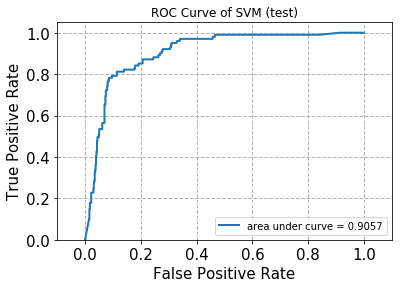

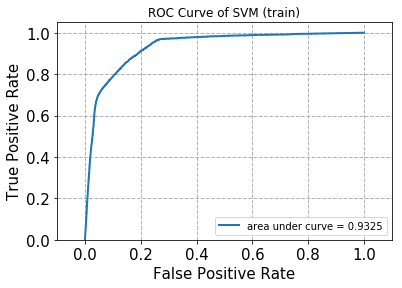

In [172]:
#ROC curve of the best

print(svm_best)

score_svm_test = svm_best.decision_function(X_test_lsi)
fpr_svm_test, tpr_svm_test, _ = metrics.roc_curve(y_test, score_svm_test)

plot_roc(fpr_svm_test, tpr_svm_test)
plt.title('ROC Curve of SVM (test)')

score_svm_train = svm_best.decision_function(X_train_lsi)
fpr_svm_train, tpr_svm_train, _ = metrics.roc_curve(y, score_svm_train)

plot_roc(fpr_svm_train, tpr_svm_train)
plt.title('ROC Curve of SVM (train)')

In [173]:
# Confusion Matrix of the best SVM and other metrics
evaluate(svm_best, 'best SVM (train)', X_train_lsi, y)
evaluate(svm_best, 'best SVM (test)', X_test_lsi, y_test)

-------------------- Confusion Matrix of best SVM (train) --------------------
[[118271   1908]
 [  6291   3267]]
-------------------- Other Evaluation of best SVM (train) --------------------
Accuracy: 0.9368029166698782
Recall: 0.3418079096045198
Precision: 0.6313043478260869
F-1 Score: 0.4434941967012828
-------------------- Confusion Matrix of best SVM (test) --------------------
[[602  27]
 [ 58  43]]
-------------------- Other Evaluation of best SVM (test) --------------------
Accuracy: 0.8835616438356164
Recall: 0.42574257425742573
Precision: 0.6142857142857143
F-1 Score: 0.5029239766081872


### Logistic Regression with L2 Regularization

In [174]:
from sklearn.linear_model import LogisticRegression

lr_L2_best = crossValidation(LogisticRegression(penalty='l2', solver='liblinear', random_state=42),
                        X_train_lsi, y)

-------------------- C = 0.01 --------------------
[0.92659678 0.92816402 0.9258774  0.92603155 0.92749602]
0.92683315348646
-------------------- C = 0.1 --------------------
[0.93381635 0.93445866 0.93245465 0.93281435 0.93397051]
0.933502903242382
-------------------- C = 1 --------------------
[0.93800421 0.93900622 0.93623144 0.93692513 0.93790144]
0.9376136889162942
-------------------- C = 10 --------------------
[0.93880068 0.94029084 0.93800421 0.93844098 0.93926314]
0.9389599712245003
-------------------- C = 100 --------------------
[0.93916037 0.94052207 0.93823545 0.93862083 0.93969991]
0.9392477262216742
-------------------- Result --------------------
The best classifier is when C = 10
Average Accuracy is: 0.9392477262216742


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


Text(0.5,1,'ROC Curve of Linear Regression with L2 Regularization (train)')

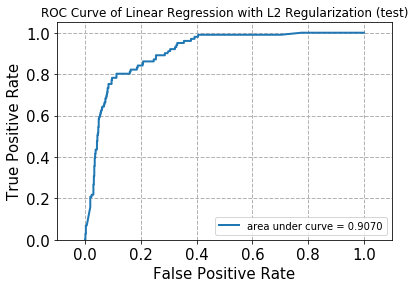

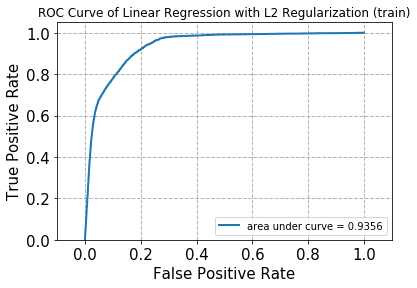

In [175]:
#ROC curve of the best

print(lr_L2_best)

score_lr_test = lr_L2_best.decision_function(X_test_lsi)
fpr_lr_test, tpr_lr_test, _ = metrics.roc_curve(y_test, score_lr_test)

plot_roc(fpr_lr_test, tpr_lr_test)
plt.title('ROC Curve of Linear Regression with L2 Regularization (test)')

score_lr_train = lr_L2_best.decision_function(X_train_lsi)
fpr_lr_train, tpr_lr_train, _ = metrics.roc_curve(y, score_lr_train)

plot_roc(fpr_lr_train, tpr_lr_train)
plt.title('ROC Curve of Linear Regression with L2 Regularization (train)')

In [176]:
# Confusion Matrix of the best SVM and other metrics
evaluate(lr_L2_best, 'best LR with L2 (train)', X_train_lsi, y)
evaluate(lr_L2_best, 'best LR with L2 (test)', X_test_lsi, y_test)

-------------------- Confusion Matrix of best LR with L2 (train) --------------------
[[118297   1882]
 [  6106   3452]]
-------------------- Other Evaluation of best LR with L2 (train) --------------------
Accuracy: 0.9384292838588837
Recall: 0.361163423310316
Precision: 0.6471691038620172
F-1 Score: 0.46360461993016383
-------------------- Confusion Matrix of best LR with L2 (test) --------------------
[[602  27]
 [ 54  47]]
-------------------- Other Evaluation of best LR with L2 (test) --------------------
Accuracy: 0.8890410958904109
Recall: 0.46534653465346537
Precision: 0.6351351351351351
F-1 Score: 0.5371428571428571


### GaussianNB

In [177]:
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB().fit(X_train_lsi, y)

GaussianNB(priors=None, var_smoothing=1e-09)


Text(0.5,1,'ROC Curve of GaussianNB (train)')

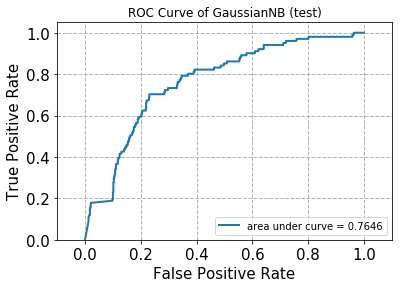

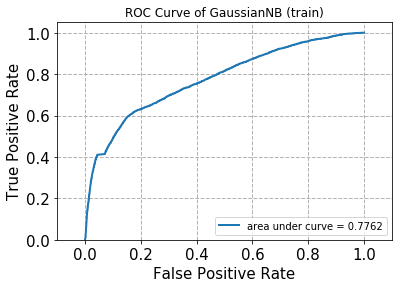

In [178]:
#ROC curve of the best

print(bayes)

score_GNB_test = bayes.predict_proba(X_test_lsi)[:,1]
fpr_GNB_test, tpr_GNB_test, _ = metrics.roc_curve(y_test, score_GNB_test)

plot_roc(fpr_GNB_test, tpr_GNB_test)
plt.title('ROC Curve of GaussianNB (test)')

score_GNB_train = bayes.predict_proba(X_train_lsi)[:,1]
fpr_GNB_train, tpr_GNB_train, _ = metrics.roc_curve(y, score_GNB_train)

plot_roc(fpr_GNB_train, tpr_GNB_train)
plt.title('ROC Curve of GaussianNB (train)')

In [179]:
# Confusion Matrix of the best SVM and other metrics
evaluate(bayes, 'best GaussianNB (train)', X_train_lsi, y)
evaluate(bayes, 'best GaussianNB (test)', X_test_lsi, y_test)

-------------------- Confusion Matrix of best GaussianNB (train) --------------------
[[85150 35029]
 [ 2968  6590]]
-------------------- Other Evaluation of best GaussianNB (train) --------------------
Accuracy: 0.7071228716557343
Recall: 0.6894747855199833
Precision: 0.15834114226675317
F-1 Score: 0.2575375657033433
-------------------- Confusion Matrix of best GaussianNB (test) --------------------
[[404 225]
 [ 21  80]]
-------------------- Other Evaluation of best GaussianNB (test) --------------------
Accuracy: 0.663013698630137
Recall: 0.7920792079207921
Precision: 0.26229508196721313
F-1 Score: 0.39408866995073893


## Question 16:

### Sentiment During All the Time

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/evanshu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


tag:  ECE219_tweet_data/tweets_#gohawks.txt


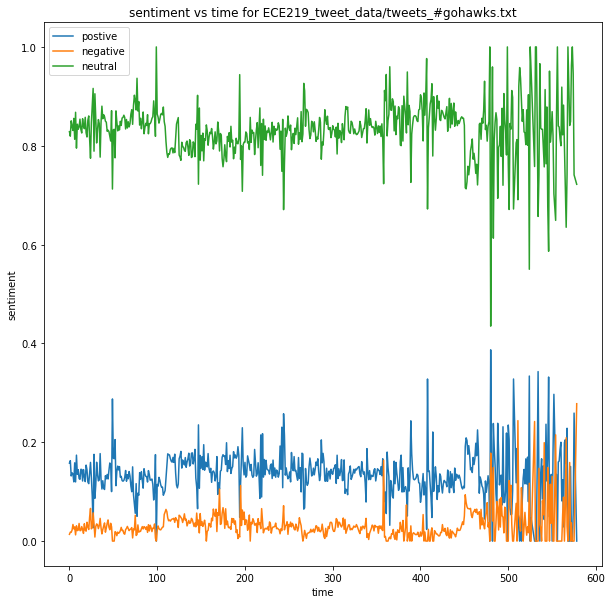

In [14]:
import nltk
import math as mt
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

sid = SentimentIntensityAnalyzer()

hashtags = ["ECE219_tweet_data/tweets_#gohawks.txt"]

for tag in hashtags: 
    with open(tag, 'r') as f:
        print ('tag: ',tag)

        max_time = max_times[tag]
        min_time = min_times[tag]
        
        total_hours = mt.floor((max_time - min_time) / (60 * 60)) + 1
        X = range(total_hours)
        positive = [0.0] * total_hours
        negative = [0.0] * total_hours
        neutral = [0.0] * total_hours
        count = [0] * total_hours
        
        lines = f.readlines()
        for line in lines:
            json_obj = json.loads(line)
            index = mt.floor((json_obj['citation_date'] - min_time) / (60 * 60))

            title = json_obj['title']
            ss = sid.polarity_scores(title)
            
            positive[index] = (positive[index] * (count[index]) + ss['pos']) / (count[index] + 1)
            negative[index] = (negative[index] * (count[index]) + ss['neg']) / (count[index] + 1)
            neutral[index] = (neutral[index] * (count[index]) + ss['neu']) / (count[index] + 1)
            count[index] = count[index] + 1
        
        x_plt = list()
        positive_nonzero = list()
        negative_nonzero = list()
        neutral_nonzero = list()
        for i in range(len(count)):
            if(count[i] != 0):
                x_plt.append(i)
                positive_nonzero.append(positive[i])
                negative_nonzero.append(negative[i])
                neutral_nonzero.append(neutral[i])
        plt.figure(figsize=(10, 10))
        plt.plot(x_plt, positive_nonzero)
        plt.plot(x_plt, negative_nonzero)
        plt.plot(x_plt, neutral_nonzero)                 
        
        plt.xlabel('time')
        plt.ylabel('sentiment')
        plt.title('sentiment vs time for ' + tag)
        plt.legend(labels = ['postive', 'negative', 'neutral'])
        plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/evanshu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


tag:  ECE219_tweet_data/tweets_#gopatriots.txt
tag:  ECE219_tweet_data/tweets_#patriots.txt


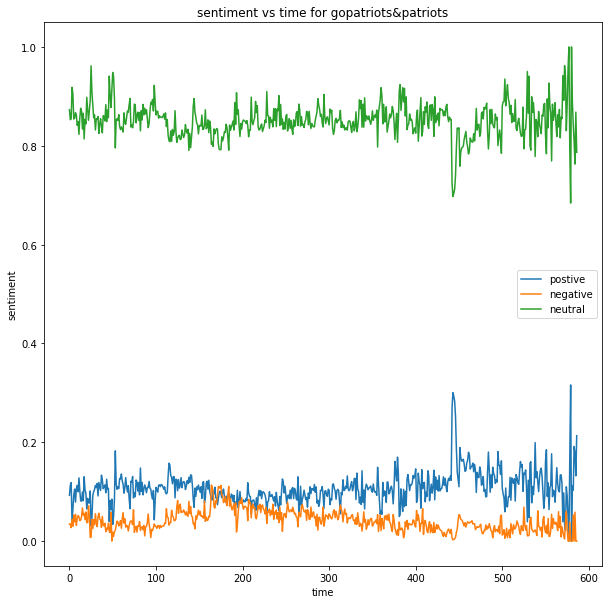

In [15]:
import nltk
import math as mt
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

sid = SentimentIntensityAnalyzer()

hashtags = ["ECE219_tweet_data/tweets_#gopatriots.txt",
            "ECE219_tweet_data/tweets_#patriots.txt",]

max_time = max(max_times[hashtags[0]], max_times[hashtags[1]])
min_time = min(min_times[hashtags[0]], min_times[hashtags[1]])

total_hours = mt.floor((max_time - min_time) / (60 * 60)) + 1
X = range(total_hours)
positive = [0.0] * total_hours
negative = [0.0] * total_hours
neutral = [0.0] * total_hours
count = [0] * total_hours

for tag in hashtags: 
    with open(tag, 'r') as f:
        print ('tag: ',tag)
        lines = f.readlines()
        for line in lines:
            json_obj = json.loads(line)
            index = mt.floor((json_obj['citation_date'] - min_time) / (60 * 60))

            title = json_obj['title']
            ss = sid.polarity_scores(title)
            
            positive[index] = (positive[index] * (count[index]) + ss['pos']) / (count[index] + 1)
            negative[index] = (negative[index] * (count[index]) + ss['neg']) / (count[index] + 1)
            neutral[index] = (neutral[index] * (count[index]) + ss['neu']) / (count[index] + 1)
            count[index] = count[index] + 1
        
x_plt = list()
positive_nonzero = list()
negative_nonzero = list()
neutral_nonzero = list()
for i in range(len(count)):
    if(count[i] != 0):
        x_plt.append(i)
        positive_nonzero.append(positive[i])
        negative_nonzero.append(negative[i])
        neutral_nonzero.append(neutral[i])
plt.figure(figsize=(10, 10))
plt.plot(x_plt, positive_nonzero)
plt.plot(x_plt, negative_nonzero)
plt.plot(x_plt, neutral_nonzero)     

plt.xlabel('time')
plt.ylabel('sentiment')
plt.title('sentiment vs time for ' + "gopatriots&patriots")
plt.legend(labels = ['postive', 'negative', 'neutral'])
plt.show()

### Sentiment During All the Day

In [18]:
import time
import pytz
import datetime

pst_tz = pytz.timezone('America/Los_Angeles')

key_time1 = datetime.datetime(2015, 2, 1, 8, 0, 0, 0, pst_tz)
key_time1_unix = time.mktime(key_time1.timetuple())

key_time2 = datetime.datetime(2015, 2, 1, 20, 0, 0, 0, pst_tz)
key_time2_unix = time.mktime(key_time2.timetuple())

print("unix time for Feb.1, 8:00 a.m.:", key_time1_unix)
print("unix time for Feb.1, 8:00 p.m.:", key_time2_unix)

unix time for Feb.1, 8:00 a.m.: 1422806400.0
unix time for Feb.1, 8:00 p.m.: 1422849600.0


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/evanshu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


tag:  ECE219_tweet_data/tweets_#gohawks.txt


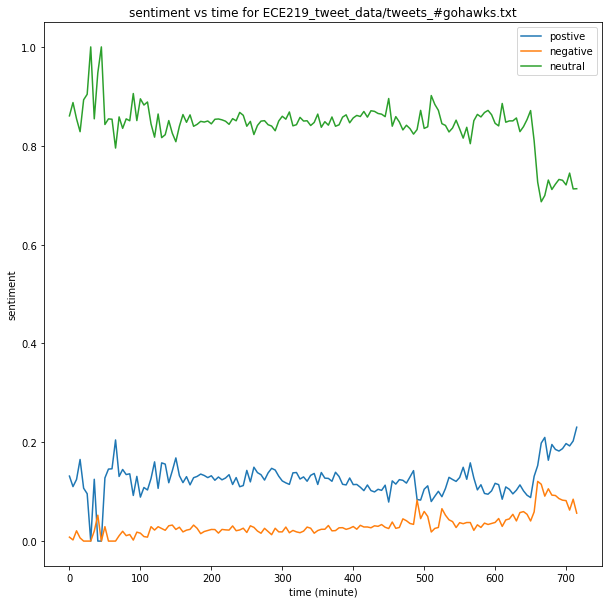

In [25]:
import nltk
import math as mt
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

sid = SentimentIntensityAnalyzer()

hashtags = ["ECE219_tweet_data/tweets_#gohawks.txt"]

for tag in hashtags: 
    with open(tag, 'r') as f:
        print ('tag: ',tag)
        
        total_windows_between = mt.floor((key_time2_unix - key_time1_unix) / (60 * 5)) + 1

        X = range(total_windows_between)
        positive = [0.0] * total_windows_between
        negative = [0.0] * total_windows_between
        neutral = [0.0] * total_windows_between
        count = [0] * total_windows_between
        
        lines = f.readlines()
        for line in lines:
            json_obj = json.loads(line)
            if(json_obj['citation_date'] >= key_time1_unix and json_obj['citation_date'] < key_time2_unix):
                index = mt.floor((json_obj['citation_date'] - key_time1_unix) / (60 * 5))

                title = json_obj['title']
                ss = sid.polarity_scores(title)

                positive[index] = (positive[index] * (count[index]) + ss['pos']) / (count[index] + 1)
                negative[index] = (negative[index] * (count[index]) + ss['neg']) / (count[index] + 1)
                neutral[index] = (neutral[index] * (count[index]) + ss['neu']) / (count[index] + 1)
                count[index] = count[index] + 1
        
        x_plt = list()
        positive_nonzero = list()
        negative_nonzero = list()
        neutral_nonzero = list()
        time = 0
        for i in range(len(count)):
            if(count[i] != 0):
                x_plt.append(time)
                positive_nonzero.append(positive[i])
                negative_nonzero.append(negative[i])
                neutral_nonzero.append(neutral[i])
            time  += 5
        plt.figure(figsize=(10, 10))
        plt.plot(x_plt, positive_nonzero)
        plt.plot(x_plt, negative_nonzero)
        plt.plot(x_plt, neutral_nonzero)                 
        
        plt.xlabel('time (minute)')
        plt.ylabel('sentiment')
        plt.title('sentiment vs time for ' + tag)
        plt.legend(labels = ['postive', 'negative', 'neutral'])
        plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/evanshu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


tag:  ECE219_tweet_data/tweets_#gopatriots.txt
tag:  ECE219_tweet_data/tweets_#patriots.txt


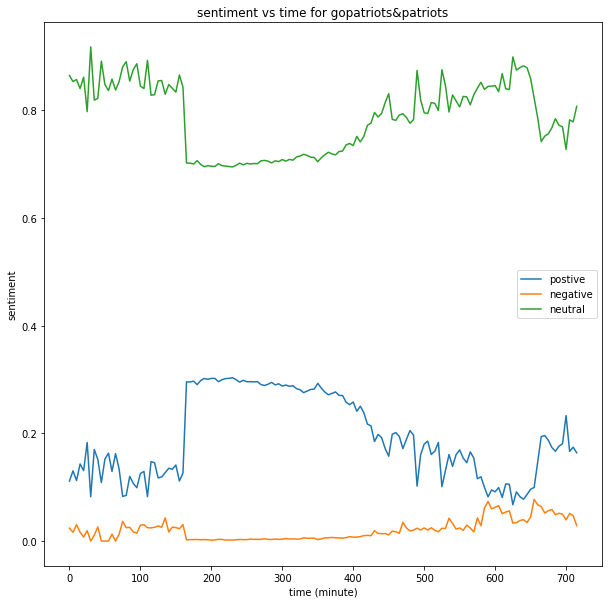

In [23]:
import nltk
import math as mt
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

sid = SentimentIntensityAnalyzer()

hashtags = ["ECE219_tweet_data/tweets_#gopatriots.txt",
            "ECE219_tweet_data/tweets_#patriots.txt",]

total_windows_between = mt.floor((key_time2_unix - key_time1_unix) / (60 * 5)) + 1
X = range(total_windows_between)
positive = [0.0] * total_windows_between
negative = [0.0] * total_windows_between
neutral = [0.0] * total_windows_between
count = [0] * total_windows_between

for tag in hashtags: 
    with open(tag, 'r') as f:
        print ('tag: ',tag)
        lines = f.readlines()
        for line in lines:
            json_obj = json.loads(line)
            if(json_obj['citation_date'] >= key_time1_unix and json_obj['citation_date'] < key_time2_unix):
                index = mt.floor((json_obj['citation_date'] - key_time1_unix) / (60 * 5))

                title = json_obj['title']
                ss = sid.polarity_scores(title)

                positive[index] = (positive[index] * (count[index]) + ss['pos']) / (count[index] + 1)
                negative[index] = (negative[index] * (count[index]) + ss['neg']) / (count[index] + 1)
                neutral[index] = (neutral[index] * (count[index]) + ss['neu']) / (count[index] + 1)
                count[index] = count[index] + 1
        
x_plt = list()
positive_nonzero = list()
negative_nonzero = list()
neutral_nonzero = list()
time_ = 0
for i in range(len(count)):
    if(count[i] != 0):
        x_plt.append(time_)
        positive_nonzero.append(positive[i])
        negative_nonzero.append(negative[i])
        neutral_nonzero.append(neutral[i])
    time_ += 5
plt.figure(figsize=(10, 10))
plt.plot(x_plt, positive_nonzero)
plt.plot(x_plt, negative_nonzero)
plt.plot(x_plt, neutral_nonzero)     

plt.xlabel('time (minute)')
plt.ylabel('sentiment')
plt.title('sentiment vs time for ' + "gopatriots&patriots")
plt.legend(labels = ['postive', 'negative', 'neutral'])
plt.show()

### Most Popular Word

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=50,stop_words='english')

files = ["ECE219_tweet_data/tweets_#gohawks.txt",
         "ECE219_tweet_data/tweets_#gopatriots.txt",
         "ECE219_tweet_data/tweets_#nfl.txt",
         "ECE219_tweet_data/tweets_#patriots.txt",
         "ECE219_tweet_data/tweets_#sb49.txt",
         "ECE219_tweet_data/tweets_#superbowl.txt"]

tweet_list = []
for file in files:
        with open(file, 'r') as f:

            tweets = f.readlines()
            for tweet in tweets:
                tweet = json.loads(tweet)
                content = tweet['title']
                tweet_list.append(content)


tfidf_vectorizer.fit_transform(tweet_list)
print(tfidf_vectorizer.vocabulary_.keys())

dict_keys(['gohawks', 'http', 'just', 'seahawks', 'superbowl', 'good', 'year', 'new', 'seattle', 'love', 'amp', 'game', 'best', 'rt', 'nfl', 've', 'going', 'let', 'time', 'got', 'great', 'touchdown', 'win', 'football', 'watch', 'super', 'bowl', 'like', 'que', 'https', 'patriots', 'en', 'la', 'el', 'commercial', 'winning', 'colts', 'pats', 'superbowlxlix', 'tom', 'brady', 'sb49', 'commercials', 'perry', 'halftime', 'katyperry', 'katy', 'seahawkswin', 'superbowlcommercials', 'patriotswin'])


### Most Popular Word for #goawks

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=50,stop_words='english')

files = ["ECE219_tweet_data/tweets_#gohawks.txt"]

tweet_list = []
for file in files:
        with open(file, 'r') as f:

            tweets = f.readlines()
            for tweet in tweets:
                tweet = json.loads(tweet)
                content = tweet['title']
                tweet_list.append(content)


tfidf_vectorizer.fit_transform(tweet_list)
print(tfidf_vectorizer.vocabulary_.keys())

dict_keys(['http', 'ready', 'just', 'seahawks', '12s', '12thman', '12', 'superbowl', 'good', 'year', 'seattle', 'hawks', 'today', 'love', 'moneylynch', 'beastmode', 'amp', 'game', 'best', 'lob', 'repete', 'team', 'rt', 'right', 'weare12', 'nfl', 'day', 'man', 'going', 'let', 'dangerusswilson', 'time', 'fan', 'got', 'rsherman_25', 'great', 'touchdown', 'win', 'football', 'super', 'bowl', 'gbvssea', 'like', 'sunday', 'nfcchampionship', 'come', 'don', 'patriots', 'superbowlxlix', 'sb49'])


### Most Popular Word for #gopatriots&patriots

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=50,stop_words='english')

files = ["ECE219_tweet_data/tweets_#gopatriots.txt",
         "ECE219_tweet_data/tweets_#patriots.txt"]

tweet_list = []
for file in files:
        with open(file, 'r') as f:

            tweets = f.readlines()
            for tweet in tweets:
                tweet = json.loads(tweet)
                content = tweet['title']
                tweet_list.append(content)


tfidf_vectorizer.fit_transform(tweet_list)
print(tfidf_vectorizer.vocabulary_.keys())

dict_keys(['gopatriots', 'patriots', 'http', 'game', 'football', 'newengland', 'team', 'rt', 'win', 'super', 'bowl', 'today', 'going', 'time', 'nfl', 'tom', 'brady', 'just', 'don', 'vs', 'colts', 'pats', 'patsnation', 'like', 'seahawks', 'let', 'el', 'amp', 'fans', 'good', 'patriotsnation', 'gopats', 'winning', 've', 'got', 'superbowlxlix', 'seattle', 'new', 'england', 'tombrady', 'los', 'belichick', 'touchdown', 'superbowl', 'patriotsvsseahawks', 'sb49', 'deflategate', 'balls', 'deflated', 'patriotswin'])


### Try to Predict a Tweet is a #GoPatriots tag or a #GoHawks tag